<a href="https://colab.research.google.com/github/nicklausmillican/ISLR_R/blob/main/ISLR_R_Ch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3

## Conceptual

### Question 1
Describe the null hypotheses to which the p-values given in **Table 3.4** correspond. Explain what conclusions you can draw based on these p-values. Your explanation should be phrased in terms of $sales$, $TV$, $radio$, and $newspaper$, rather than in terms of the coefcients of the linear model.

#### Answer
First, I'm going to recreate **Table 3.4**.


| Term       | Coefficient | Std. error | t-statistic | p-value  |
|------------|-------------|------------|-------------|----------|
| Intercept  | 2.939       | 0.3119     | 9.42        | < 0.0001 |
| TV         | 0.046       | 0.0014     | 32.81       | < 0.0001 |
| radio      | 0.189       | 0.0086     | 21.89       | < 0.0001 |
| newspaper  | -0.001      | 0.0059     | -0.18       | 0.8599   |

Now for the null-hypotheses.  The first thing to recognize is that the values from this table are taken from multiple regression.  

Next, it's helpful to get a sense of null-hypothesis signifcance testing.  The basic idea is that we detail what we think a probability distribution of our outcome variable would look like if it was not realted to the explanatory variable(s) in question.  We can call this a *null* distribution; the "null hypothesis" is the hypothesis that the null distribution accurately describes the data.  If it does, we retain the null hypothesis; if it does not, we reject it.

Thus, a generic phrasing for each p-value is something like:
>"After accounting for _____, _____, and _____, there is no association between $sales$ and _____."

For example, let's consider $TV$:
>"After accounting for $radio$, $newspaper$, and the $Intercept$, there is no association between $sales$ and $TV$."

As for the conclusions based on p-values, these can also follow a generic script:
>"After accounting for _____, _____, and _____, the null hypothesis that the association between $sales$ and _____ being due to chance is _____% probable."

So again for $TV$:
>"After accounting for $radio$, $newspaper$, and the $Intercept$, the null hypothesis that the association between $sales$ and $TV$ being due to chance is < 0.0001% probable."

### Question 2
Carefully explain the diferences between the KNN classifer and KNN regression methods.

#### Answer
As both a classifier and regression method, "KNN" refers to a method of using the k nearest datapoints (in predictor-variable space) to determine the outcome value.  The difference between KNN classification and KNN regression is the difference in the outcome variable (classification vs quantity) and the method of estimation (majority rules vs local average).

| | KNN Classifier | KNN Regression |
|-|----------------|----------------|
| Predictor Variables | *k* nearest datapoints in predictor-variable space | *k* nearest datapoints in predictor-variable space |
| Method of estimation | Marjority of k classifications | Mean of k values |
| Outcome Variable | Qualitative category | Quantitative estimate |

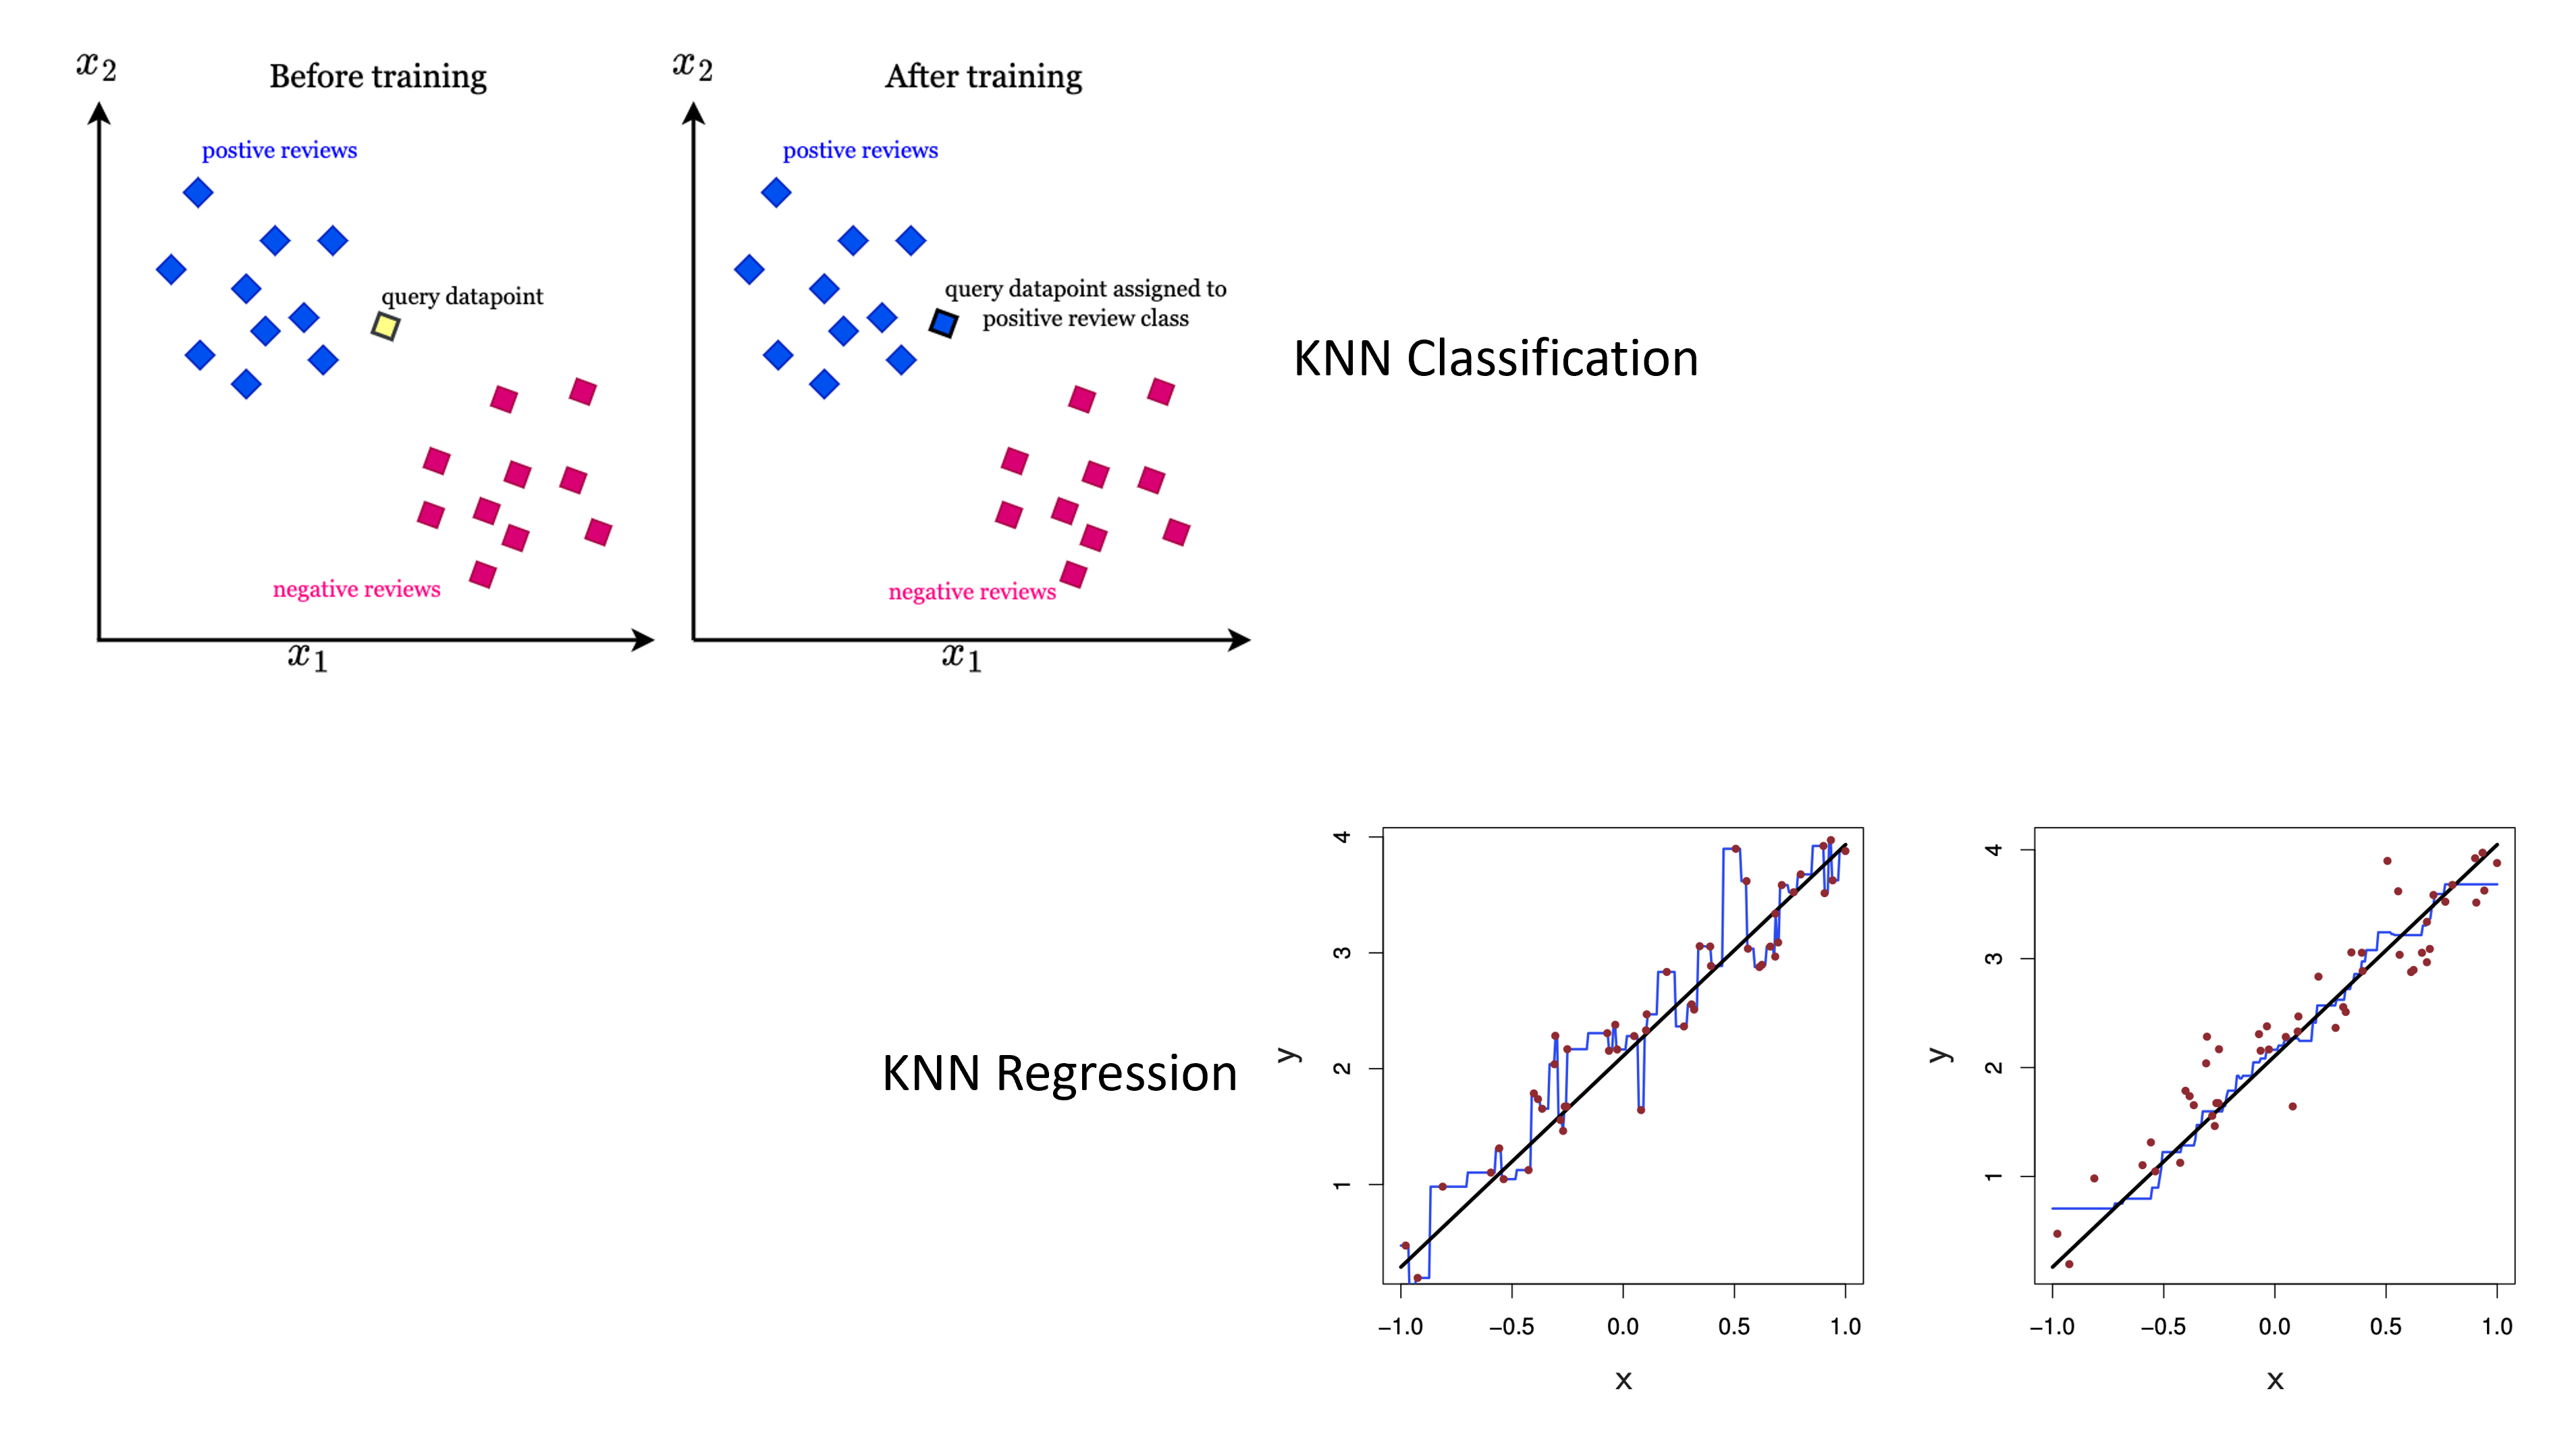

### Question 3a-3c
Suppose we have a data set with fve predictors, $X1$ = GPA, $X2$ = IQ, $X3$ = Level (1 for College and 0 for High School), $X4$ = Interaction between GPA and IQ, and $X5$ = Interaction between GPA and Level. The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to ft the model, and get $\hat{\beta}_0 = 50$, $\hat{\beta}_1 = 20$, $\hat{\beta}_2 = 0.07$, $\hat{\beta}_3 = 35$, $\hat{\beta}_4 = 0.01$, $\hat{\beta}_5 = -10$.

>(a) Which answer is correct, and why?

>>i. For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates.

>>ii. For a fxed value of IQ and GPA, college graduates earn more, on average, than high school graduates.

>>iii. For a fxed value of IQ and GPA, high school graduates earn more, on average, than college graduates provided that the GPA is high enough.

>>iv. For a fxed value of IQ and GPA, college graduates earn more, on average, than high school graduates provided that the GPA is high enough.

>(b) Predict the salary of a college graduate with IQ of 110 and a GPA of 4.0.

>(c) True or false: Since the coefcient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer.

#### Answers
It will help to lay out our regression formula:

> $Salary = 50 + 20*GPA + 0.07*IQ + 35*EduLevel + 0.01*GPA*IQ - 10*GPA*EduLevel$

##### (a)
> i. Possibly.  While college predicts \$35,000 more earnings than no college (since $\hat{\beta}_3 = 35$), earnings decrease with GPA by \$10,000 for every GPA point.  So a high-enough GPA, say 4.0, would make this statement true.

> ii. Possibly.  By the same reasoning above, college graduates are predicted to earn more then non-college graduates as long as GPA is not too high.

> iii. True.  See i.

> iv. False.  See i and ii.

##### (b)
Let's just plug these values into the regression equation:

> $Salary = 50 + 20*4.0 + 0.07*110 + 35*1 + 0.01*4.0*110 - 10*4.0*1 = 137,100$

##### (c)
False.  The level of evidence would be encapsulated by the p-value.

### Questions 4a-4d
I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then ft a linear regression model to the data, as well as a separate cubic regression, i.e. $Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$.

> (a) Suppose that the true relationship between X and Y is linear, i.e. $Y = \beta_0 + \beta_1X + \epsilon$. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

> (b) Answer (a) using test rather than training RSS.

> (c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

> (d) Answer (c) using test rather than training RSS.

#### Answers
##### (a)
As we add more predictor variables, the training RSS will generally decrease.  In the language used so far, this is because the additional parameters to be estimated make the model more flexible, thus reducing error on the training data.

##### (b)
The test RSS, however, is different.  The error incurred in predicting the test data with a too-flexible model will increase error due to increased variance.

##### (c)
Due to the same mechanism in (a), the more-flexible cubic model will have lower error on training data than the linear model.

##### (d)
Here, we'd need more information.  We know the linear model will not be optimally flexible and will therefore likely incur more error due to bias.  The question is, how much error will the cubic model incur?

### Question 5
Consider the ftted values that result from performing linear regression without an intercept. In this setting, the ith ftted value takes the form

$\hat{y}_i = x_i \hat{\beta}$

where

$\hat{\beta} = \left(\sum_{i=1}^nx_iy_i\right) / \left(\sum_{i' = 1}^n x^2_{i'}\right)$

Show that we can write

$\hat{y}_i = \sum_{i' = 1}^na_{i'}y_{i'}$

What is $a_i$?

*Note: We interpret this result by saying that the ftted values from linear regression are linear combinations of the response values.*

#### Answer
Let's start by rewriting the equation for $\hat{y}_i$ where we substitute for $\beta$.

$\hat{y}_i = x_i \left(\sum_{i=1}^nx_iy_i\right) / \left(\sum_{i' = 1}^n x^2_{i'}\right)$

Now multiplying $x_i$ through and simplifying a bit, we get

$\hat{y}_i = \left(\sum_{i=1}^nx_ix_iy_i\right) / \left(\sum_{i' = 1}^n x^2_{i'}\right)$

which we can rearrange to look like

$\hat{y}_i = \sum_{i=1}^n  \frac{ x_i x_{i}}{\sum_{i' = 1}^n x^2_{i'}} y_{i}$

The important thing here is not the derivation, but to notice that the estimate for y given our model $\hat{y}$ is a scalar multiple $a_i$ of the observed value $y$, and that that scalar value is calulated from the explanatory variable(s) $x$.  

### Question 6
Using Equation (3.4),

$\hat{\beta}_1 = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}$

$\hat{\beta}_0 = \bar{y} - \hat{\beta}_1\bar{x}$


argue that in the case of simple linear regression, the least squares line always passes through the point $(\bar{x}, \bar{y})$.

#### Answer
Start with

$\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$

$\hat{y}_i = \bar{y} - \hat{\beta}_1 \bar{x} + \hat{\beta}_1 x_i$

We don't need the equation for $\beta_1$.  When $x_i = \bar{x}$, we get

$\hat{y}_i = \bar{y} + (- \hat{\beta}_1 \bar{x} + \hat{\beta}_1 \bar{x})
= \bar{y}$

Since the x-domain for the line of $\hat{y}_i$ will always contain $\bar{x}$, the line will always contain $\bar{x}$, and its value there will always be $\bar{y}$.

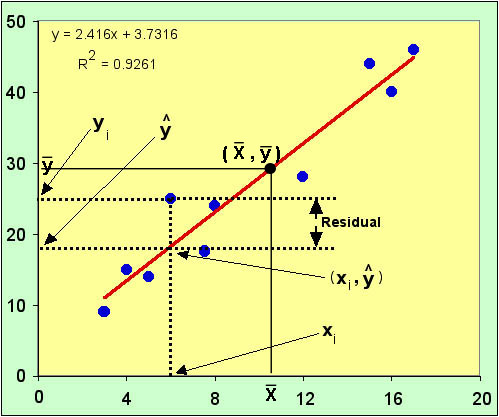

(from https://ww2.tnstate.edu/ganter/BIO%20311%20Ch%2012%20Regression.html)

### Question 7
It is claimed in the text that in the case of simple linear regression of Y onto $X$, the $R^2$ statistic (3.17),

> $R^2 = \frac{TSS - RSS}{TSS} = 1 - \frac{RSS}{TSS}$

> where

> $RSS = \sum_{i=1}^n{(y_i - \hat{y}_i)^2}$

> and

> $TSS = \sum_{i=1}^n{(y_i - \bar{y}_i)^2}$,

is equal to the square of the correlation between $X$ and $Y$ (3.18)

> $Cor(X, Y) = \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n{(x_i - \bar{x})^2}\sum_{i=1}^n{(y_i - \bar{y})^2}}}$.


Prove that this is the case. For simplicity, you may assume that $\bar{x} = \bar{y} = 0$.

#### Answer
When $\bar{x} = \bar{y} = 0$,

> $TSS = \sum_{i=1}^n{(y_i)^2}$

> and

> $Cor(X, Y) = \frac{\sum_{i=1}^n x_i y_i}{\sqrt{\sum_{i=1}^n{x_i^2}\sum_{i=1}^n{y_i^2}}}$.

We'll also use the fact that

> $\hat{y}_i = \beta x$,

> where, as we learned above above,

> $\beta = \frac{\sum_{i=1}^n x_i y_i}{\sum_{i = 1}^n x^2_{i}}$.

We need to show that

$R^2 = \text{Cor}(X, Y)^2 =
\left( \frac{\sum_{i=1}^n x_i y_i}{\sqrt{\sum_{i=1}^n{x_i^2}\sum_{i=1}^n{y_i^2}}} \right)^2 =
\frac{\left( \sum_{i=1}^n x_i y_i \right)^2}{\left( \sum_{i=1}^n{x_i^2} \right) \left( \sum_{i=1}^n{y_i^2} \right)}$.


Let's start by expanding

$R^2 =
1 - \frac{RSS}{TSS} =
1 - \frac{\sum_{i=1}^n{(y_i - \hat{y}_i)^2}}{\sum_{i=1}^n{y_i^2}} =
1 - \frac{\sum_{i=1}^n{(y_i - \beta x_i)^2}}{\sum_{i=1}^n{y_i^2}} =
1 - \frac{\sum_{i=1}^n{(y_i - \beta x_i)(y_i - \beta x_i)}}{\sum_{i=1}^n{y_i^2}} =
1 - \frac{\sum_{i=1}^n{y_i^2 - 2\beta x_i y_i + \beta^2 x_i^2}}{\sum_{i=1}^n{y_i^2}} =
1 - \left(\frac{\sum_{i=1}^n{y_i^2}}{\sum_{i=1}^n{y_i^2}} - 2\frac{\sum_{i = 1}^n\beta{x_i y_i}}{\sum_{i=1}^n{y_i^2}} + \frac{\sum_{i = 1}^n{\beta^2 x_i^2}}{\sum_{i=1}^n{y_i^2}}\right) =
1 - 1 + 2\frac{\sum_{i = 1}^n{\beta x_i y_i}}{\sum_{i=1}^n{y_i^2}} - \frac{\beta^2 x_i^2}{\sum_{i=1}^n{y_i^2}} =
2\beta \frac{\sum_{i = 1}^n{x_i y_i}}{\sum{y_i^2}} - \beta^2 \frac{\sum_{i = 1}^n{x_i^2}}{\sum{y_i^2}} =
2(\frac{\sum_{i=1}^n x_i y_i}{\sum_{i = 1}^n x^2_{i}}) \frac{\sum_{i = 1}^n{x_i y_i}}{\sum_{i = 1}^n{y_i^2}} - (\frac{\sum_{i=1}^n x_i y_i}{\sum_{i = 1}^n x^2_{i}})^2 \frac{\sum_{i = 1}^n{x_i^2}}{\sum_{i = 1}^n{y_i^2}} =
2 \frac{\sum_{i=1}^n{x_i^2 y_i^2}}{\sum_{i=1}^n{x_i^2} \sum_{i=1}^n{y_i^2}} - \frac{\sum_{i=1}^n{x_i^2 y_i^2}}{\sum_{i=1}^n{x_i^2} \sum_{i=1}^n{y_i^2}} =
\frac{\sum_{i=1}^n{x_i^2 y_i^2}}{\sum_{i=1}^n{x_i^2} \sum_{i=1}^n{y_i^2}} =
Cor(X, Y)^2$

## Applied

In [ ]:
install.packages("ISLR")
library(ISLR)

#### Questions 8a-8c
This question involves the use of simple linear regression on the `Auto` data set.

> (a) Use the `lm()` function to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor. Use the `summary()` function to print the results. Comment on the output. For example:

> > i. Is there a relationship between the predictor and the response?

> > ii. How strong is the relationship between the predictor and the response?

> > iii. Is the relationship between the predictor and the response positive or negative?

> > iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction intervals?

> (b) Plot the response and the predictor. Use the `abline()` function to display the least squares regression line.

> (c) Use the `plot()` function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

##### Answers
###### (a)

In [ ]:
data(Auto)

mpg_reg <- lm(mpg ~ horsepower,
              data = Auto)

summary(mpg_reg)


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


> i-iii.   There is strong evidence that `mpg` is associated with `horsepower`, as indicated by the low p-value.  The estimate of this relationship is that `mpg` is reduced by an average -0.16 units per 1-unit increase in `horsepower`; the standard error of this estimate is < 0.01.

> iv.   To get the predicted `mpg` when `horsepower` = 98, we could just use the parameters estimates from the `summary` readout,

> > $mpg = \alpha + \beta_{horsepower}*horsepower = 39.94 - 0.16*98 = 24.26$,

> or calulate it in R,

In [ ]:
as.numeric(
  coef(mpg_reg)[1] + coef(mpg_reg)[2]*98
  )

[1] 24.46708

> or use the `predict` function in r,

In [ ]:
predict(mpg_reg, data.frame(horsepower=98), interval="prediction", level=0.95)

,fit,lwr,upr
1,24.46708,14.8094,34.12476


> (discrepancies due to rounding)

> The inverval represented by `lwr` and `upr` are the 95% *prediction intervals*.  We can also calculate a 95% *confidence interval* around this prediction's mean by changing a single arguement.

In [ ]:
predict(mpg_reg, data.frame(horsepower=98), interval="confidence", level=0.95)

,fit,lwr,upr
1,24.46708,23.97308,24.96108


The difference between the *prediction interval* and the *confidence interval* is that the prediction intervals uses standard deviation and refers to a range of values for the prediction, while the confidence interval uses the standard error (which is smaller than the standard deviation by $\frac{1}{\sqrt{n}}$, which is why the confidence interval is tighter than the prediction interval) and refers to the mean value of the prediction.

###### (b)

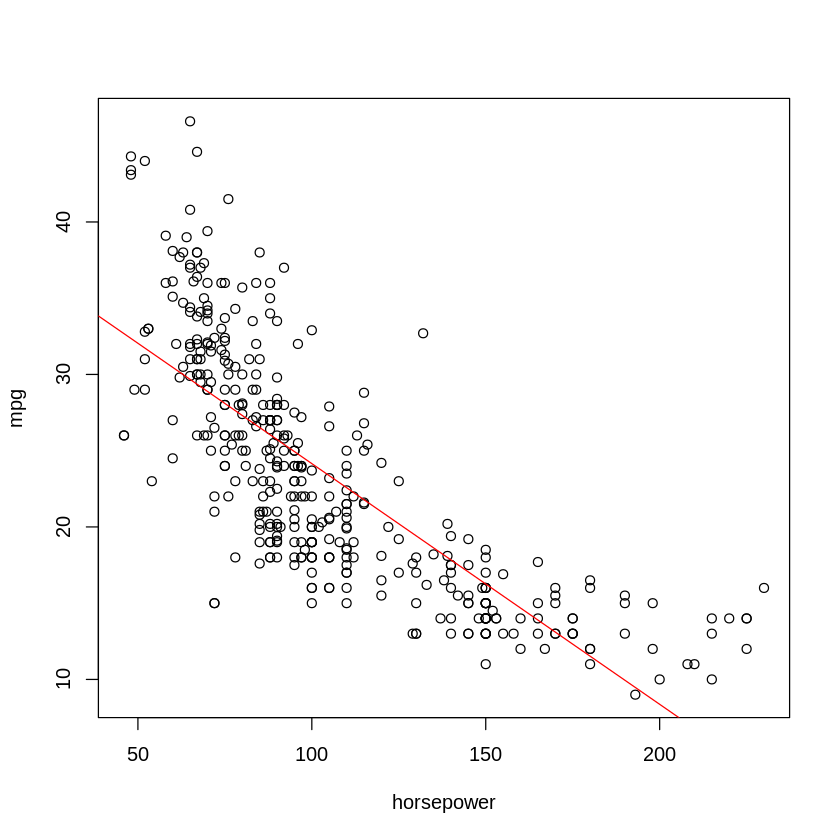

In [ ]:
plot(mpg ~ horsepower,
     data = Auto)
abline(mpg_reg, col="red")

###### (c)

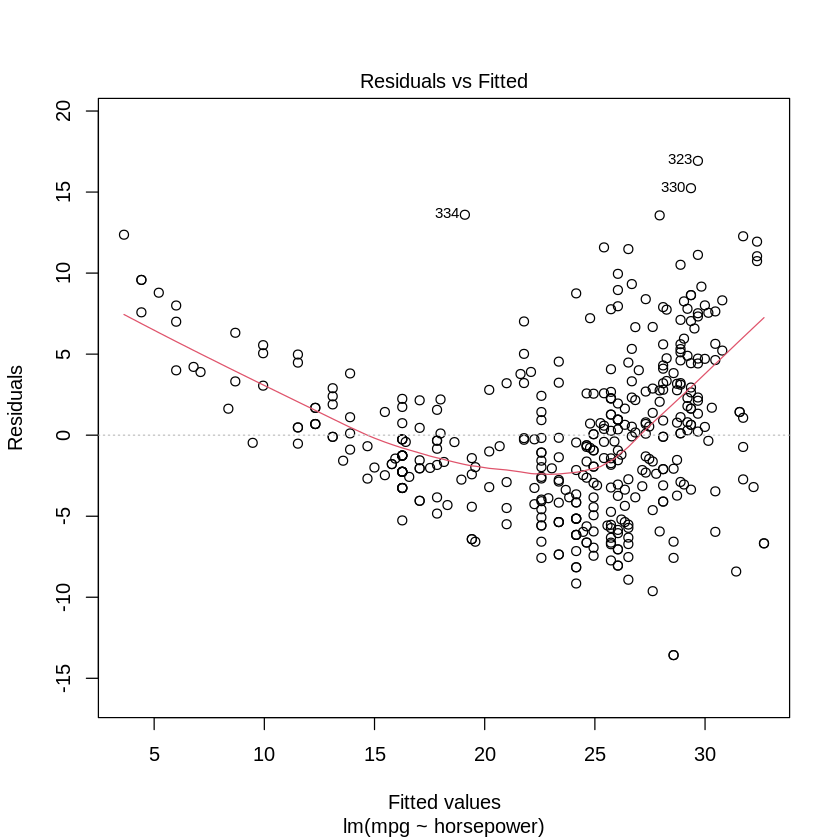

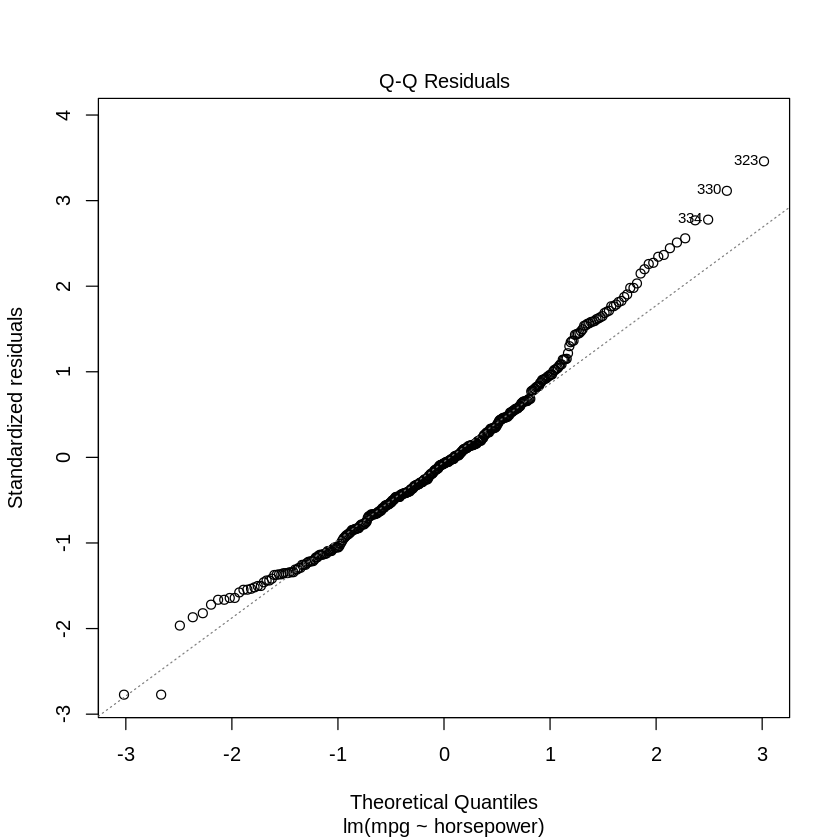

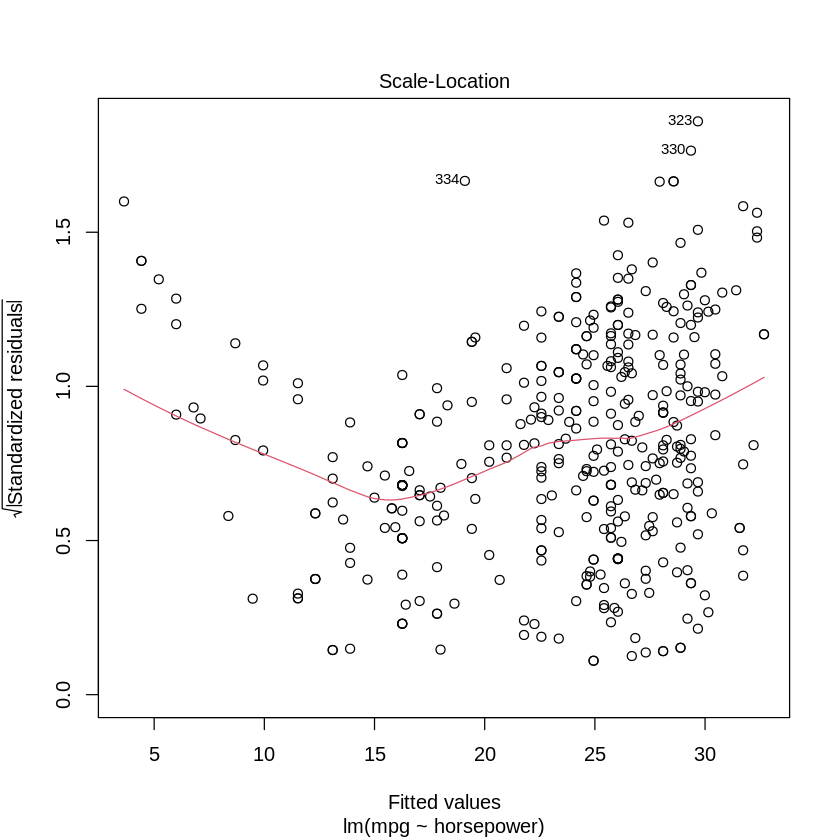

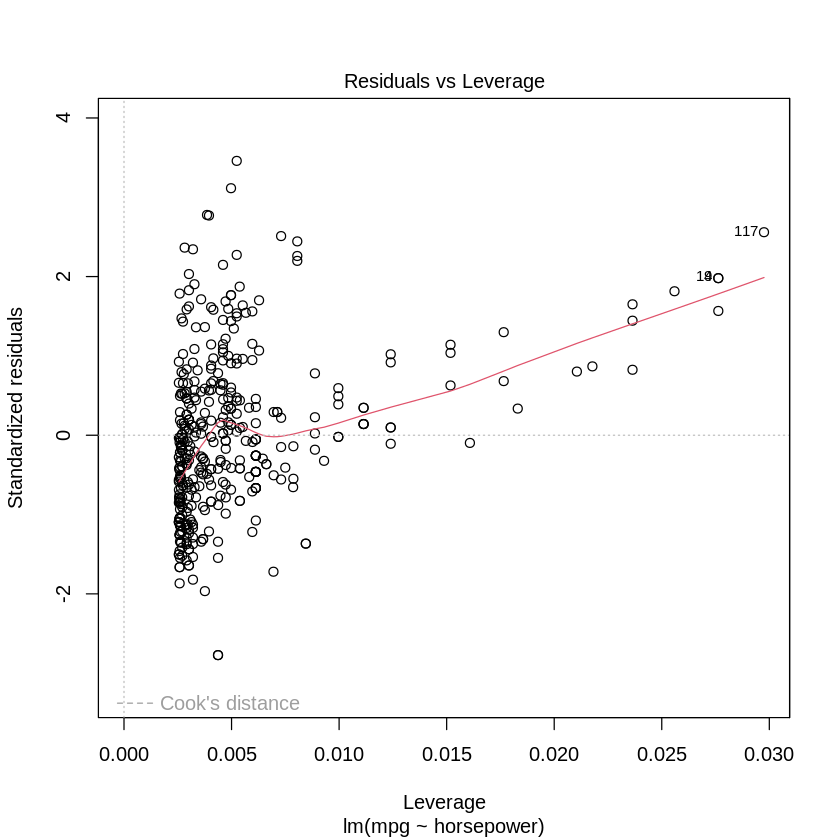

In [ ]:
plot(mpg_reg)

From the first plot, "Residuals vs Fitted", and third plot, "Scale-Location", we notice that the residuals are not constant across fitted values, which violates the *constant variance* assumption of normal linear regression.

From the second plot, "QQ plot", we see deviation of the standardized residuals from linear.  This suggests that the data may not be well-approximated by a normal distribution, which is an assumption of normal linear regression.

From the fourth plot, "Residuals vs Leverage", we see some high-leverage points.  In other words, values far on both the *Leverage* *Standardized residuals* axes exert a lot of influence in determining the parameter estimates of the regression.  These points may be considered "outliers".  They should be checked for error, or they indicate that normal linear regression may not be great for this data.

### Questions 9a-9f
This question involves the use of multiple linear regression on the `Auto` data set.

> (a) Produce a scatterplot matrix which includes all of the variables in the data set.

> (b) Compute the matrix of correlations between the variables using the function `cor()`. You will need to exclude the `name` variable, which is qualitative.

> (c) Use the `lm()` function to perform a multiple linear regression with `mpg` as the response and all other variables except name as the predictors. Use the `summary()` function to print the results. Comment on the output. For instance:

> > i. Is there a relationship between the predictors and the response?

> > ii. Which predictors appear to have a statistically significant relationship to the response?

> > iii. What does the coefficient for the `year` variable suggest?

> (d) Use the `plot()` function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

> (e) Use the `*` and `:` symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

> (f) Try a few different transformations of the variables, such as $log(X)$, $\sqrt{X}$, $X^2$. Comment on your findings.

#### Answers

In [ ]:
install.packages("ISLR")
library(ISLR)

data(Auto)

#### (a)

In [ ]:
pairs(subset(Auto, select=-name))

#### (b)

In [ ]:
round(cor(subset(Auto, select=-name)),2)

#### (c)

In [ ]:
mpg_reg2 <- lm(mpg ~ .,
               data=subset(Auto, select=-name))

summary(mpg_reg2)

I don't like the idea of "determining if variables have a relationship" to `mpg`.  All we have is a sample of data from many possible samples of data, and our model which encodes a set of assumptions.  Instead, here we have the `Estimate` for the relationships between each predictor variable and `mpg`, and our confidence in that `Estimate`, given the assumptions of the model, are encapsulated in the `p-value`.  Having said that, we have estimates of each relationship, but some are more compelling than others.

In the case of year, the `Estimate = 0.75` and low `p-value` suggests that newer cars get better gas mileage.  More precisely, that a car gets 0.75 $\pm$ 0.05 less mpg for every year old the car is.

#### (d)

In [ ]:
plot(mpg_reg2)

As we say in Problem 8, the "Residuals vs Fitted" and "Scale-Location" plots show quite a bit of heteroskedasticity, and the "Q-Q Residuals" plot shows some deviation of the residuals from what is expected for normal distribution.  The "Residuals vs Leverage" plot shows a couple high-leverage points (especially point 14), though it's hard to say that they represent "outliers" since they have reasonably small residuals.

#### (e)
With 7 predictor variables, the number of possible interaction terms is daunting.  So we'll select just a few.

When we want to specify an interaction between A and B, we use `A:B`.  If we want not only the interaction but also the main effects of A and B, we can use `A*B`.  The code will give an example of both.

In [ ]:
mpg_regX <- lm(mpg ~ cylinders*displacement + horsepower:weight + acceleration,
               data=Auto)

summary(mpg_regX)

You should track which terms are included in the output to the terms specified in the `lm()` formula, noting how the `*` and `:` differ.  Anyway, we have some significant interactions here, but don't take them too seriously.  This model was haphazardly constructed; who know what inappropriate assumptions are embedded.

#### (f)
Let's just modify the regression from Problem 8.

In [ ]:
mpg_hp <- lm(mpg ~ horsepower, data = Auto)
coef(mpg_hp)

mpg_LOGhp <- lm(mpg ~ log(horsepower), data = Auto)
coef(mpg_LOGhp)

mpg_SQRThp <- lm(mpg ~ sqrt(horsepower), data = Auto)
coef(mpg_SQRThp)

mpg_SQUAREhp <- lm(mpg ~ I(horsepower^2), data = Auto) # Notice the I().  We need to do this to get an exponent in there
coef(mpg_SQUAREhp)

In [ ]:
par(mfrow=c(4,3))
plot(mpg_hp, which=c(1,2,5))
plot(mpg_LOGhp, which=c(1,2,5))
plot(mpg_SQRThp, which=c(1,2,5))
plot(mpg_SQUAREhp, which=c(1,2,5))

Of course, the model coefficients differ between models, as do their diagnostics.  I won't detail these--the differences are too many to list.

### Questions 10a-10h
This question should be answered using the `Carseats` data set.

> (a) Fit a multiple regression model to predict `Sales` using `Price`, `Urban`, and `US`.

> (b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

> (c) Write out the model in equation form, being careful to handle the qualitative variables properly.

> (d) For which of the predictors can you reject the null hypothesis $H_0: \beta_j = 0$

> (e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

> (f) How well do the models in (a) and (e) fit the data?

> (g) Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

> (h) Is there evidence of outliers or high leverage observations in the model from (e)?

#### Answers

In [ ]:
install.packages("ISLR")
library(ISLR)

Let's learn a bit about the `Carseats` dataset first.

In [ ]:
data(Carseats)
?Carseats
str(Carseats)

'data.frame':	400 obs. of  11 variables:
 $ Sales      : num  9.5 11.22 10.06 7.4 4.15 ...
 $ CompPrice  : num  138 111 113 117 141 124 115 136 132 132 ...
 $ Income     : num  73 48 35 100 64 113 105 81 110 113 ...
 $ Advertising: num  11 16 10 4 3 13 0 15 0 0 ...
 $ Population : num  276 260 269 466 340 501 45 425 108 131 ...
 $ Price      : num  120 83 80 97 128 72 108 120 124 124 ...
 $ ShelveLoc  : Factor w/ 3 levels "Bad","Good","Medium": 1 2 3 3 1 1 3 2 3 3 ...
 $ Age        : num  42 65 59 55 38 78 71 67 76 76 ...
 $ Education  : num  17 10 12 14 13 16 15 10 10 17 ...
 $ Urban      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 2 1 1 ...
 $ US         : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 1 2 1 2 ...


##### (a)

In [ ]:
CS_reg <- lm(Sales ~ Price + Urban + US, data=Carseats)

##### (b)

In [ ]:
summary(CS_reg)


Call:
lm(formula = Sales ~ Price + Urban + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


After accounting for `Price`, `Urban` and `US`, there is strong evidence that `Sales` is is associated with `Price` and `US`, but not `Urban`.  `Sales` is estimated to decrease by  ~0.05 units (0.05 x 1,000 = 50) for every 1-unit increase in `Price`.  `US=1` stores sell 1.2 (1.2 x 1,000 = 1,200) units more than `US=0` stores.

##### (c)
$Sales = \alpha + \beta_{Price} Price + \beta_{Urban} Urban + \beta_{US} US = 13.04 - (0.05*Price) - (0.02*Urban_{yes}) + (1.2*US_{yes})$

##### (d)
From part (b), we can reject $H_0$ for $\beta_{Price}$ and $\beta_{US}$

##### (e)

In [ ]:
CS_reg_trunc <- lm(Sales ~ Price + US, data=Carseats)

##### (f)

In [ ]:
summary(CS_reg)
summary(CS_reg_trunc)


Call:
lm(formula = Sales ~ Price + Urban + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16



Call:
lm(formula = Sales ~ Price + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9269 -1.6286 -0.0574  1.5766  7.0515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.03079    0.63098  20.652  < 2e-16 ***
Price       -0.05448    0.00523 -10.416  < 2e-16 ***
USYes        1.19964    0.25846   4.641 4.71e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.469 on 397 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2354 
F-statistic: 62.43 on 2 and 397 DF,  p-value: < 2.2e-16


We can compare fits by comparing some diagnostics that are available att the bottom of the `summary()` output.

|                         | CS_reg         | CS_reg_trunc | Better Fit   |
| ----------------------- | ------         | ------------ | ------------ |
| Residual standard error | 2.472          | 2.469        | CS_reg_trunc |
| Multiple R-squared      | 0.2393         | 0.2393       | draw         |
| Adjusted R-squared      | 0.2335         | 0.2354       | CS_reg_trunc |
| F-statistic, p-value    | 41.52, < 2e-16 |62.43, < 2e_16| CS_reg_trunc |

So the model from (e), `CS_reg_trunc`, seems to be a better fit.

##### (g)

In [ ]:
confint(CS_reg_trunc, level=0.95)

,2.5 %,97.5 %
(Intercept),11.79032020,14.27126531
Price,-0.06475984,-0.04419543
USYes,0.69151957,1.70776632


(h)

43,43,0.04333766
175,175,0.02968672
166,166,0.02856661
126,126,0.02596614
368,368,0.02370705


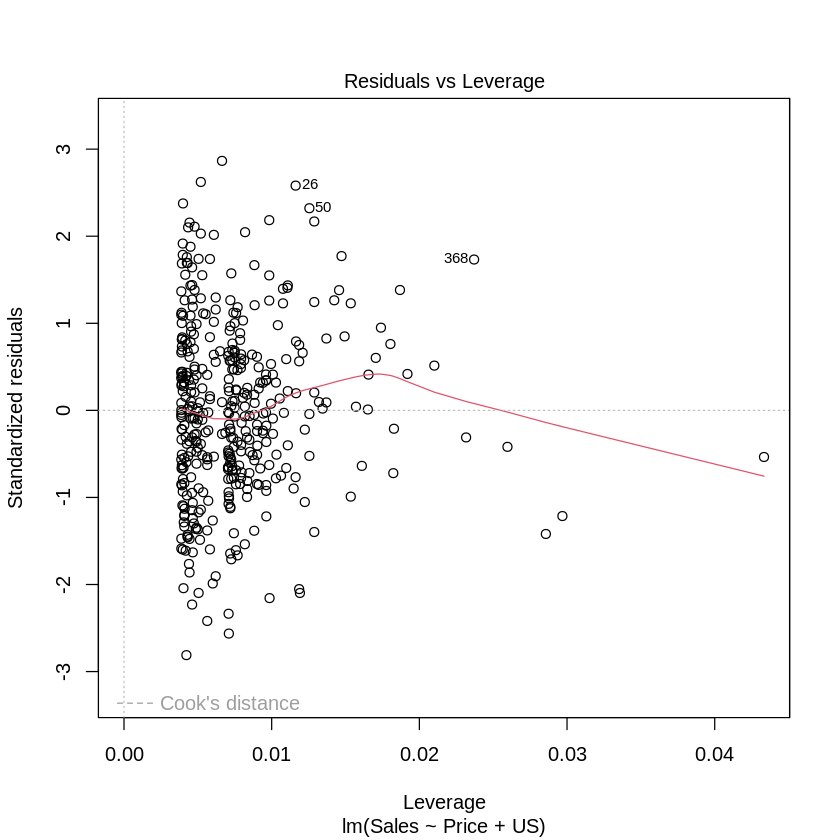

In [ ]:
plot(CS_reg_trunc, which=5)

cbind(order(hatvalues(CS_reg_trunc), decreasing = TRUE),
      hatvalues(CS_reg_trunc)[order(hatvalues(CS_reg_trunc), decreasing = TRUE)])[1:5,]

### Questions 11a-11f
In this problem we will investigate the t-statistic for the null hypothesis $H_0: \beta=0$ in simple linear regression without an intercept. To begin, we generate a predictor x and a response y as follows.

In [ ]:
set.seed(1)
x <- rnorm(100)
y <- 2*x + rnorm(100)

> (a) Perform a simple linear regression of `y` onto `x`, without an intercept. Report the coefficient estimate $\hat{\beta}$, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis $H_0: \beta=0$. Comment on these results. (You can perform regression without an intercept using the command `lm(y∼x+0)`.)

> (b) Now perform a simple linear regression of `x` onto `y` without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis $H_0: \beta=0$. Comment on these results.

> (c) What is the relationship between the results obtained in (a) and (b)?

> (d) For the regression of `Y` onto `X` without an intercept, the t-statistic for $H_0: \beta=0$ takes the form $\hat{\beta} / SE(\hat{\beta})$, where $\hat{\beta}$ is given by (3.38),

> > $\hat{\beta}=\frac{\sum_{i=1}^n x_i y_i}{\sum_{i=1}^n x_i^2}$

> and where

> > $SE(\hat{\beta}) = \sqrt{{\frac{\sum_{i=1}^n (y_i - x_i \hat{\beta})^2}{(n-1) \sum_{i=1}^n x_i^2}}}$

> (These formulas are slightly different from those given in Sections 3.1.1 and 3.1.2, since here we are performing regression without an intercept.) Show algebraically, and confirm numerically in R, that the t-statistic can be written as

> > $\frac{(\sqrt{n-1}) \sum_{i=1}^n x_i y_i}{\sqrt{(\sum_{i=1}^n x_i^2)(\sum_{i=1}^n y_i^2)-(\sum_{i=1}^n x_i y_i)^2}}$

> (e) Using the results from (d), argue that the t-statistic for the regression of 'y' onto 'x' is the same as the t-statistic for the regression of 'x' onto 'y'.

>(f) In R, show that when regression is performed with an intercept, the t-statistic for $H_0: \beta_1=0$ is the same for the regression of `y` onto `x` as it is for the regression of `x` onto `y`.

#### Answers

##### (a)
***Perform a simple linear regression of `y` onto `x`, without an intercept. Report the coefficient estimate $\hat{\beta}$, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis $H_0: \beta=0$. Comment on these results. (You can perform regression without an intercept using the command `lm(y∼x+0)`.)***

In [ ]:
m_yx <- lm(y ~ 0 +  x)

summary(m_yx)


Call:
lm(formula = y ~ 0 + x)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9154 -0.6472 -0.1771  0.5056  2.3109 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
x   1.9939     0.1065   18.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9586 on 99 degrees of freedom
Multiple R-squared:  0.7798,	Adjusted R-squared:  0.7776 
F-statistic: 350.7 on 1 and 99 DF,  p-value: < 2.2e-16


##### (b)
***Now perform a simple linear regression of `x` onto `y` without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis $H_0: \beta=0$. Comment on these results.***

In [ ]:
m_xy <- lm(x ~ 0 + y)

summary(m_xy)


Call:
lm(formula = x ~ 0 + y)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8699 -0.2368  0.1030  0.2858  0.8938 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
y  0.39111    0.02089   18.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4246 on 99 degrees of freedom
Multiple R-squared:  0.7798,	Adjusted R-squared:  0.7776 
F-statistic: 350.7 on 1 and 99 DF,  p-value: < 2.2e-16


##### (c)
***What is the relationship between the results obtained in (a) and (b)?***

In [ ]:
round(rbind("x" = summary(m_yx)$coef,
            "y" = summary(m_xy)$coef),4)

,Estimate,Std. Error,t value,Pr(>|t|)
x,1.9939,0.1065,18.7259,0
y,0.3911,0.0209,18.7259,0


The coefficient `t value`s and p-values are equivalent.

##### (d)
***For the regression of `Y` onto `X` without an intercept, the t-statistic for $H_0: \beta=0$ takes the form $\hat{\beta} / SE(\hat{\beta})$, where $\hat{\beta}$ is given by (3.38),***

> > $\hat{\beta}=\frac{\sum_{i=1}^n x_i y_i}{\sum_{i=1}^n x_i^2}$

> ***and where***

> > $SE(\hat{\beta}) = \sqrt{{\frac{\sum_{i=1}^n (y_i - x_i \hat{\beta})^2}{(n-1) \sum_{i=1}^n x_i^2}}}$

> ***(These formulas are slightly different from those given in Sections 3.1.1 and 3.1.2, since here we are performing regression without an intercept.) Show algebraically, and confirm numerically in R, that the t-statistic can be written as***

> > $\frac{(\sqrt{n-1}) \sum_{i=1}^n x_i y_i}{\sqrt{(\sum_{i=1}^n x_i^2)(\sum_{i=1}^n y_i^2)-(\sum_{i=1}^n x_i y_i)^2}}$


Let's first show the proof.

$t = \frac{\hat{\beta} - 0} {SE(\hat{\beta})}
= \frac{\hat{\beta}}{\sqrt{\frac{\sum_{i=1}^n (y_i - x_i \beta)^2}{(n-1)\sum_{i=1}^n x_i^2}}}
= \frac{\sum_{i=1}^n x_i y_i}{\sum_{i=1}^n x_i^2} \frac{\sqrt{(n-1)\sum_{i=1}^n x_i^2}}{\sqrt{\sum_{i=1}^n (y_i - x_i \beta)^2}}$

$\rightarrow t^2 = \frac{(\sum_{i=1}^n x_i y_i)^2}{(\sum_{i=1}^n x_i^2)^2} \frac{(n-1)\sum_{i=1}^n x_i^2}{\sum_{i=1}^n (y_i - x_i \beta)^2}
= \frac{(\sum_{i=1}^n x_i y_i)^2}{\sum_{i=1}^n x_i^2} \frac{(n-1)}{\sum_{i=1}^n (y_i - x_i \beta)^2}$

$\rightarrow t = \frac{\sum_{i=1}^n x_i y_i}{\sqrt{\sum_{i=1}^n x_i^2}} \frac{\sqrt{(n-1)}}{\sqrt{\sum_{i=1}^n (y_i - x_i \beta)^2}} =
\frac{\sqrt{n-1}\sum_{i=1}^n x_i y_i}{\sqrt{\sum_{i=1}^n x_i^2 \sum_{i=1}^n (y_i - x_i \beta)^2}}$

$= \frac{\sqrt{n-1}\sum_{i=1}^n x_i y_i}{\sqrt{\sum_{i=1}^n x_i^2 \sum_{i=1}^n y_i^2 - 2 y_i x_i \beta + x_i^2 \beta^2}}
= \frac{\sqrt{n-1}\sum_{i=1}^n x_i y_i}{\sqrt{\sum_{i=1}^n x_i^2 \sum_{i=1}^n y_i^2 - \sum_{i=1}^n x_i^2 2 y_i x_i \beta + \sum_{i=1}^n x_i^2 x_i^2 \beta^2}}$

$= \frac{\sqrt{n-1}\sum_{i=1}^n x_i y_i}{\sqrt{\sum_{i=1}^n x_i^2 \sum_{i=1}^n y_i^2 +\sum_{i=1}^nx^2 \beta (\sum_{i=1}^n x^2 \beta - \sum_{i=1}^n 2 x_i y_i)}}
= \frac{\sqrt{n-1}\sum_{i=1}^n x_i y_i}{\sqrt{\sum_{i=1}^n x_i^2 \sum_{i=1}^n y_i^2 +\sum_{i=1}^nx^2 \frac{\sum_{i=1}^n x_i y_i}{\sum_{i=1}^n x_i^2} (\sum_{i=1}^n x^2 \frac{\sum_{i=1}^n x_i y_i}{\sum_{i=1}^n x_i^2} - \sum_{i=1}^n 2 x_i y_i)}}$

$= \frac{\sqrt{n-1}\sum_{i=1}^n x_i y_i}{\sqrt{\sum_{i=1}^n x_i^2 \sum_{i=1}^n y_i^2 + \sum_{i=1}^n x_i y_i(\sum_{i=1}^n x_i y_i  - \sum_{i=1}^n 2 x_i y_i)}}
= \frac{\sqrt{n-1}\sum_{i=1}^n x_i y_i}{\sqrt{\sum_{i=1}^n x_i^2 \sum_{i=1}^n y_i^2 + ((\sum_{i=1}^n x_i y_i)^2  - 2 (\sum_{i=1}^n x_i y_i)^2)}}$

$= \frac{\sqrt{n-1}\sum_{i=1}^n x_i y_i}{\sqrt{\sum_{i=1}^n x_i^2 \sum_{i=1}^n y_i^2 - (\sum_{i=1}^n x_i y_i)^2}}$


Now let's check it numerically.

In [ ]:
m_xy_t <- summary(m_xy)$coef[1,3]
proof_t <- (sqrt(length(x)-1) * sum(x*y)) / (sqrt(sum(x*x) * sum(y*y) - (sum(x*y))^2))

m_xy_t
proof_t

[1] 18.72593

[1] 18.72593

As you can see, the t-statistics from our `m0` model and our proof are the same.

##### (e)
***Using the results from (d), argue that the t-statistic for the regression of 'y' onto 'x' is the same as the t-statistic for the regression of 'x' onto 'y'.***

You can just go through the proof, but switching x and y.  These are just labels.

##### (f)
***In R, show that when regression is performed with an intercept, the t-statistic for $H_0: \beta_1=0$ is the same for the regression of `y` onto `x` as it is for the regression of `x` onto `y`.***

Just like part (e)

In [ ]:
m2_yx <- lm(y ~ x)
m2_xy <- lm(x ~ y)

summary(m2_yx)$coef[2,3]
summary(m2_xy)$coef[2,3]

[1] 18.5556

[1] 18.5556

Again, same t-statistics.

### Questions 12a-12c
This problem involves simple linear regression without an intercept.

>   (a) Recall that the coefficient estimate $\hat{\beta}$ for the linear regression of Y onto X without an intercept is given by (3.38).

> >   $\hat{\beta}=\frac{\sum_{i=1}^n x_i y_i}{\sum_{i=1}^n x_i^2}$

>   Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?

>   (b) Generate an example in R with n = 100 observations in which the coefficient estimate for the regression of X onto Y is different from the coefficient estimate for the regression of Y onto X.

>   (c) Generate an example in R with n = 100 observations in which the coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X.

#### Answers

##### (a)
***Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?***

$\hat{\beta}_{Y \sim X} = \frac{\sum_{i=1}^n x_i y_i}{\sum_{i=1}^n x_i^2}$ and $\hat{\beta}_{X \sim Y} = \frac{\sum_{i=1}^n y_i x_i}{\sum_{i=1}^n y_i^2}$.  Notice that the numerator from both coefficients are always equal (since $(x \times y) = (y \times x)$; only the denominators can differ.

Thus, $\hat{\beta}_{Y \sim X} = \hat{\beta}_{X \sim Y}$ when $\sum_{i}^n x_i^2 = \sum_{i}^n y_i^2$.

##### (b)
***Generate an example in R with n = 100 observations in which the coefficient estimate for the regression of X onto Y is different from the coefficient estimate for the regression of Y onto X.***

This just comes down to generating data wherein $\sum_{i}^n x_i^2 \not = \sum_{i}^n y_i^2$.

In [ ]:
x = rnorm(n=100, mean=0, sd=1)
y = rnorm(n=100, mean=10, sd=2)

m1 <- lm(y ~ 0 + x)
m2 <- lm(x ~ 0 + y)

summary(m1)$coef
summary(m2)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
x,-1.835978,0.9794329,-1.874532,0.06380534


,Estimate,Std. Error,t value,Pr(>|t|)
y,-0.01866962,0.009959618,-1.874532,0.06380534


Notice the coefficients are different between the two models; $\hat{\beta}_{Y \sim X} \not = \hat{\beta}_{X \sim Y}$.

##### (c)
***Generate an example in R with n = 100 observations in which the coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X.***

This time, we simply need to generate data wherein $\sum_{i}^n x_i^2 = \sum_{i}^n y_i^2$.  I'll do this by setting $Y$ to be $-X$.  I'll have to *garble* up the order of the variables with the `sample()` function to add some *noise* to the estimate.

In [ ]:
x = rnorm(n=100, mean=0, sd=1)
y = -sample(x=x, size=100, replace=FALSE)

m3 <- lm(y ~ 0 + x)
m4 <- lm(x ~ 0 + y)

summary(m3)$coef
summary(m4)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
x,0.1086506,0.0999088,1.087498,0.2794575


,Estimate,Std. Error,t value,Pr(>|t|)
y,0.1086506,0.0999088,1.087498,0.2794575


Notice the coefficients are identical between the two models; $\hat{\beta}_{Y \sim X} = \hat{\beta}_{X \sim Y}$.

### Questions 13a-13j
In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use `set.seed(1)` prior to starting part (a) to ensure consistent results.

(a) Using the `rnorm()` function, create a vector, `x`, containing 100 observations drawn from a $N(0, 1)$ distribution. This represents a feature, $X$.

(b) Using the `rnorm()` function, create a vector, `eps`, containing 100 observations drawn from a $N(0, 0.25)$ distribution—a normal distribution with mean zero and variance 0.25.

(c) Using `x` and `eps`, generate a vector `y` according to the model $Y = −1+0.5X + ϵ$ (3.39). What is the length of the vector `y`? What are the values of $β_0$ and $β_1$ in this linear model?

(d) Create a scatterplot displaying the relationship between $x$ and $y$. Comment on what you observe.

(e) Fit a least squares linear model to predict $y$ using $x$. Comment on the model obtained. How do $\hat{β}_0$ and $\hat{β}_1$ compare to $β_0$ and $β_1$?

(f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the `legend()` command to create an appropriate legend.

(g) Now fit a polynomial regression model that predicts $y$ using $x$ and $x^2$. Is there evidence that the quadratic term improves the model fit? Explain your answer.

(h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term $ϵ$ in (b). Describe your results.

(i) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term $ϵ$ in (b). Describe your results.

(j) What are the confidence intervals for $β_0$ and $β_1$ based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

#### Answers

##### (a)
***Using the `rnorm()` function, create a vector, x, containing 100 observations drawn from a  N(0,1)  distribution. This represents a feature,  X .***

In [ ]:
x <- rnorm(n=100, mean=0, sd=1)

##### (b)
***Using the `rnorm()` function, create a vector, `eps`, containing 100 observations drawn from a $N(0, 0.25)$ distribution—a normal distribution with mean zero and variance 0.25.***

In [ ]:
eps <- rnorm(n=100, mean=0, sd=sqrt(0.25))

##### (c)
***Using `x` and `eps`, generate a vector `y` according to the model $Y = −1+0.5X + ϵ$ (3.39). What is the length of the vector `y`? What are the values of $β_0$ and $β_1$ in this linear model?***

In [ ]:
y <- -1 + 0.5*x + eps

length(y)

[1] 100

Here, $\beta_0 = -1$ and $\beta_1 = 0.5$.

##### (d)
***Create a scatterplot displaying the relationship between $x$ and $y$. Comment on what you observe.***

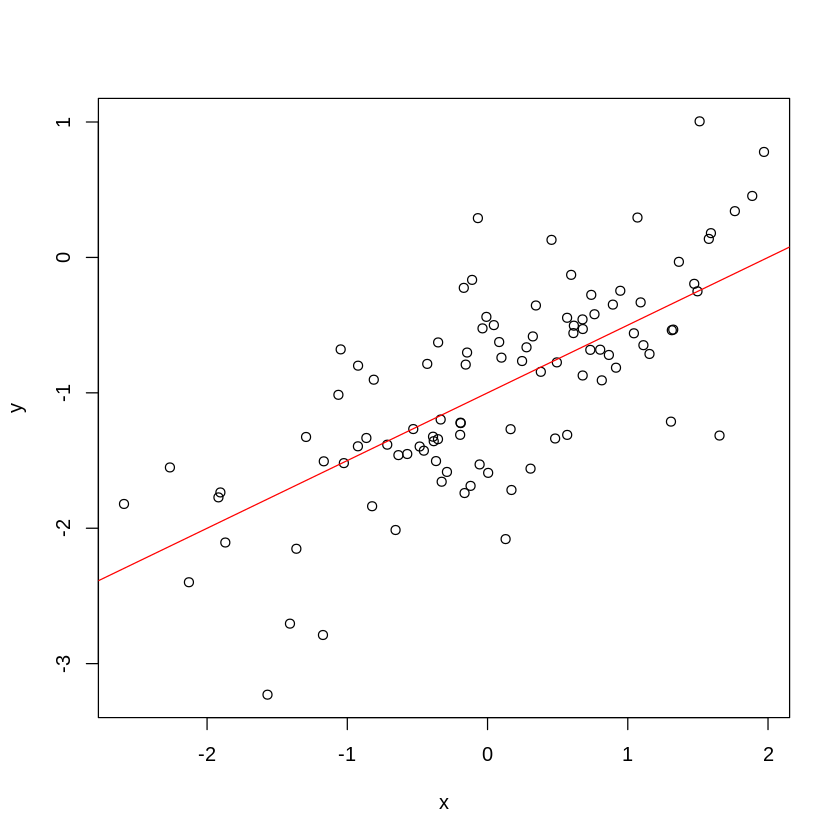

In [ ]:
plot(y ~ x)
abline(a=-1, b=0.5, col="red")

##### (e)
***Fit a least squares linear model to predict $y$ using $x$. Comment on the model obtained. How do $\hat{β}_0$ and $\hat{β}_1$ compare to $β_0$ and $β_1$?***

In [ ]:
m <- lm(y ~ x)
summary(m)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.36567 -0.28264  0.01012  0.31550  1.31670 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.98814    0.05173  -19.10   <2e-16 ***
x            0.55777    0.05235   10.65   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5166 on 98 degrees of freedom
Multiple R-squared:  0.5367,	Adjusted R-squared:  0.5319 
F-statistic: 113.5 on 1 and 98 DF,  p-value: < 2.2e-16


The intercept, $\hat{\beta}_0$, and slope for $x$, $\hat{\beta}_1$ are nearly identical to- but not exactly equal to the $\beta_0 = -1$ and $\beta_1 = 0.5$ assigned when generating the data.

##### (f)
***Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the `legend()` command to create an appropriate legend.***

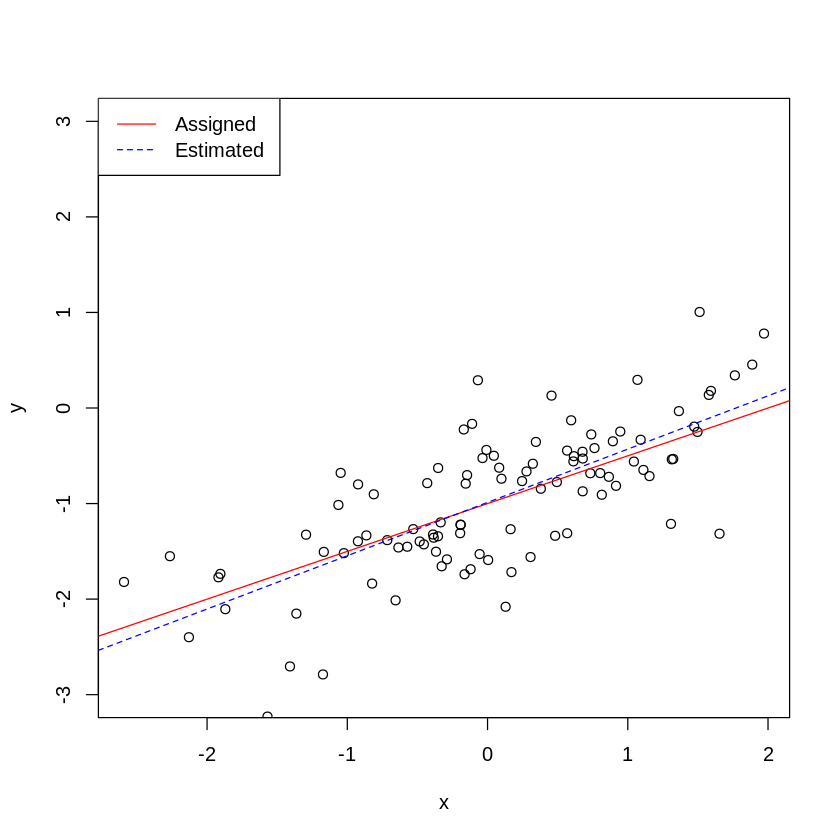

In [ ]:
plot(y ~ x, ylim=c(-3,3))
abline(a=-1, b=0.5, col="red")
abline(m, col="blue", lty=2)
legend("topleft",
  c("Assigned", "Estimated"),
  col = c("red", "blue"),
  lty = c(1, 2)
)

##### (g)
***Now fit a polynomial regression model that predicts  $y$  using  $x$  and  $x^2$ . Is there evidence that the quadratic term improves the model fit? Explain your answer.***

In [ ]:
m_poly <- lm(y ~ poly(x, 2))

summary(m)
summary(m_poly)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.36567 -0.28264  0.01012  0.31550  1.31670 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.98814    0.05173  -19.10   <2e-16 ***
x            0.55777    0.05235   10.65   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5166 on 98 degrees of freedom
Multiple R-squared:  0.5367,	Adjusted R-squared:  0.5319 
F-statistic: 113.5 on 1 and 98 DF,  p-value: < 2.2e-16



Call:
lm(formula = y ~ poly(x, 2))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.41409 -0.32695  0.02972  0.27372  1.35945 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.95936    0.05164 -18.579   <2e-16 ***
poly(x, 2)1  5.50353    0.51636  10.658   <2e-16 ***
poly(x, 2)2  0.53631    0.51636   1.039    0.302    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5164 on 97 degrees of freedom
Multiple R-squared:  0.5418,	Adjusted R-squared:  0.5323 
F-statistic: 57.34 on 2 and 97 DF,  p-value: < 2.2e-16


Whether or not the $x^2$ term improves the fit of the model depends on what we mean by fit.  Adding terms will not usually make the model fit worse the training data--but it may cause overfitting and thus hurt fit to non-training data.

In this case, we can use the `F-statistic`, `Residual standard error`, and `Multiple R-squared` to assess within-sample fit; we could also use `anova(m, m_poly)` to compare their to in-sample fits.  We can use `Adjusted R-squared` to look at out-of-sample fit.  Depending on the run, the in-sample and out-of-sample fits may improve or decline.  Since we made the data, we know that the out-of-sample fit should get worse with the $x^2$ term; when it does not, this is due to sampling bias (as well as the fact that `Adjusted R-squared` is not a great measure of out-of-sample fit).

##### (h)
***Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term $ϵ$ in (b). Describe your results.***


Call:
lm(formula = y_h ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.23559 -0.06000  0.00082  0.05613  0.21719 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.988876   0.009029 -109.53   <2e-16 ***
x            0.495432   0.009138   54.22   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09016 on 98 degrees of freedom
Multiple R-squared:  0.9677,	Adjusted R-squared:  0.9674 
F-statistic:  2940 on 1 and 98 DF,  p-value: < 2.2e-16



Call:
lm(formula = y_h ~ poly(x, 2))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.231488 -0.060911  0.002275  0.060063  0.196564 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -0.963310   0.009032 -106.655   <2e-16 ***
poly(x, 2)1  4.888446   0.090320   54.124   <2e-16 ***
poly(x, 2)2  0.073227   0.090320    0.811    0.419    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09032 on 97 degrees of freedom
Multiple R-squared:  0.968,	Adjusted R-squared:  0.9673 
F-statistic:  1465 on 2 and 97 DF,  p-value: < 2.2e-16


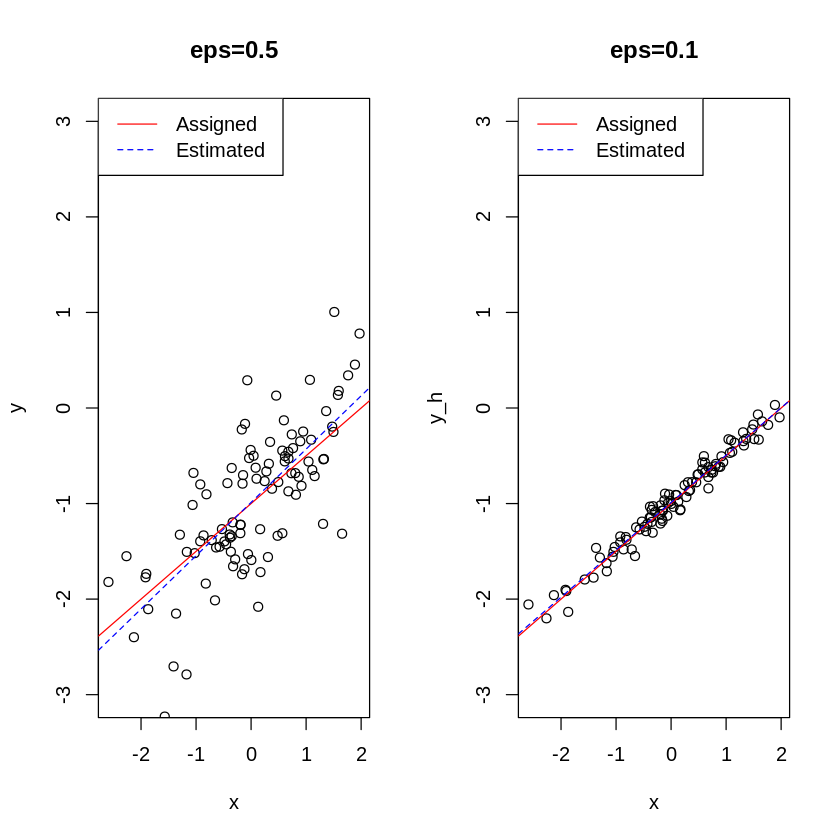

In [ ]:
eps_h <- rnorm(n=100, mean=0, sd=0.1)
y_h <- -1 + 0.5*x + eps_h

m_h <- lm(y_h ~ x)

par(mfrow=c(1,2))
plot(y ~ x, main="eps=0.5", ylim=c(-3,3))
abline(a=-1, b=0.5, col="red")
abline(m, col="blue", lty=2)
legend("topleft",
  c("Assigned", "Estimated"),
  col = c("red", "blue"),
  lty = c(1, 2)
)

plot(y_h ~ x, main="eps=0.1", ylim=c(-3,3))
abline(a=-1, b=0.5, col="red")
abline(m_h, col="blue", lty=2)
legend("topleft",
  c("Assigned", "Estimated"),
  col = c("red", "blue"),
  lty = c(1, 2)
)

m_h_poly <- lm(y_h ~ poly(x,2))
summary(m_h)
summary(m_h_poly)

##### (i)
***Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term $ϵ$ in (b). Describe your results.***


Call:
lm(formula = y_i ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8377 -0.6357 -0.1283  0.5513  2.3209 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.03490    0.09624 -10.753  < 2e-16 ***
x            0.44357    0.09741   4.554 1.52e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9611 on 98 degrees of freedom
Multiple R-squared:  0.1746,	Adjusted R-squared:  0.1662 
F-statistic: 20.74 on 1 and 98 DF,  p-value: 1.517e-05



Call:
lm(formula = y_i ~ poly(x, 2))

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8503 -0.6211 -0.1417  0.5688  2.2794 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.01201    0.09644 -10.494  < 2e-16 ***
poly(x, 2)1  4.37671    0.96435   4.538 1.63e-05 ***
poly(x, 2)2 -0.56400    0.96435  -0.585     0.56    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9644 on 97 degrees of freedom
Multiple R-squared:  0.1775,	Adjusted R-squared:  0.1606 
F-statistic: 10.47 on 2 and 97 DF,  p-value: 7.636e-05


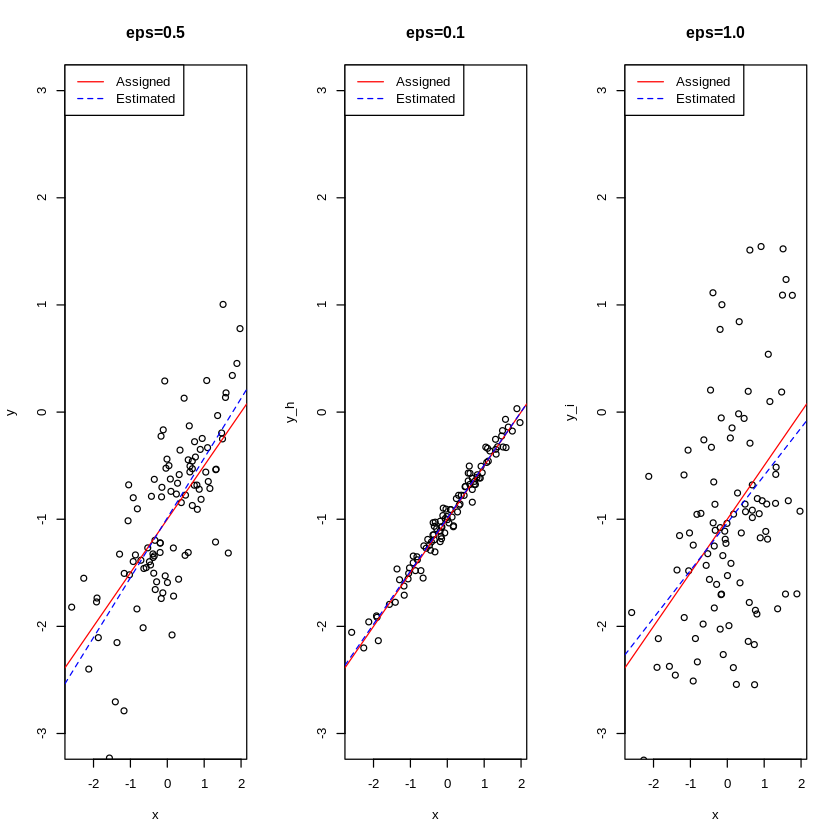

In [ ]:
eps_i <- rnorm(n=100, mean=0, sd=1)
y_i <- -1 + 0.5*x + eps_i

m_i <- lm(y_i ~ x)

par(mfrow=c(1,3))
plot(y ~ x, main="eps=0.5", ylim=c(-3,3))
abline(a=-1, b=0.5, col="red")
abline(m, col="blue", lty=2)
legend("topleft",
  c("Assigned", "Estimated"),
  col = c("red", "blue"),
  lty = c(1, 2)
)
plot(y_h ~ x, main="eps=0.1", ylim=c(-3,3))
abline(a=-1, b=0.5, col="red")
abline(m_h, col="blue", lty=2)
legend("topleft",
  c("Assigned", "Estimated"),
  col = c("red", "blue"),
  lty = c(1, 2)
)
plot(y_i ~ x, main="eps=1.0", ylim=c(-3,3))
abline(a=-1, b=0.5, col="red")
abline(m_i, col="blue", lty=2)
legend("topleft",
  c("Assigned", "Estimated"),
  col = c("red", "blue"),
  lty = c(1, 2)
)

m_i_poly <- lm(y_i ~ poly(x,2))
summary(m_i)
summary(m_i_poly)

##### (j)
***What are the confidence intervals for $β_0$ and $β_1$ based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.***

In [ ]:
round(confint(m),2)
round(confint(m_h),2)
round(confint(m_i),2)

,2.5 %,97.5 %
(Intercept),-1.09,-0.89
x,0.45,0.66


,2.5 %,97.5 %
(Intercept),-1.01,-0.97
x,0.48,0.51


,2.5 %,97.5 %
(Intercept),-1.23,-0.84
x,0.25,0.64


The CI increases with the `sd` of `eps`.

### Questions 14a-14g
This problem focuses on the collinearity problem.

> (a)   Perform the following commands in `R`:

In [ ]:
set.seed(1)
x1 <- runif(100)
x2 <- 0.5*x1 + rnorm(100) / 10
y <- 2 + 2*x1 + 0.3*x2 + rnorm(100)

> The last line corresponds to creating a linear model in which `y` is a function of `x1` and `x2`. Write out the form of the linear model. What are the regression coefficients?

>   (b) What is the correlation between `x1` and `x2`? Create a scatterplot displaying the relationship between the variables.

>   (c) Using this data, fit a least squares regression to predict `y` using `x1` and `x2`. Describe the results obtained. What are $\hat{\beta}_0$, $\hat{\beta}_1$, and $\hat{\beta}_2$? How do these relate to the true $\beta_0$, $\beta_1$, and $\beta_2$? Can you reject the null hypothesis $H0: \beta_1 = 0$? How about the null hypothesis $H0: \beta_2 = 0$?

>   (d) Now fit a least squares regression to predict `y` using only `x1`. Comment on your results. Can you reject the null hypothesis $H0: \beta_1 = 0$?

>   (e) Now fit a least squares regression to predict `y` using only `x2`. Comment on your results. Can you reject the null hypothesis $H0: \beta_2 = 0$?

>   (f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.

>   (g) Now suppose we obtain one additional observation, which was unfortunately mismeasured.

In [ ]:
x1 <- c(x1, 0.1)
x2 <- c(x2, 0.8)
y <- c(y, 6)

>   Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

#### Answers

##### (a)
***Perform the following commands in `R`:***

In [ ]:
set.seed(1)
x1 <- runif(100)
x2 <- 0.5*x1 + rnorm(100) / 10
y <- 2 + 2*x1 + 0.3*x2 + rnorm(100)

***The last line corresponds to creating a linear model in which `y` is a function of `x1` and `x2`. Write out the form of the linear model. What are the regression coefficients?***

$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \epsilon$

where $\beta_0 = 2$, $\beta_1 = 2$, $\beta_2 = 3$, and $\epsilon \sim normal(mean = 0, var = 1)$

That $\beta_2 = 3$ may not be obvious; afterall, we set `beta_2 = 0.3`.  But remember that a $\beta_p$ coeffecient represents the change in $y$ for a 1-unit increase in $x_p$.  If you look back at the code that generated `x2`, you'll notice that it's on the scale of $1/10$; thus, we should expect $\hat{\beta}_2$ to be $10 \times 0.3 = 3.0$.

##### (b)
***What is the correlation between `x1` and `x2`? Create a scatterplot displaying the relationship between the variables.***

[1] 0.8351212

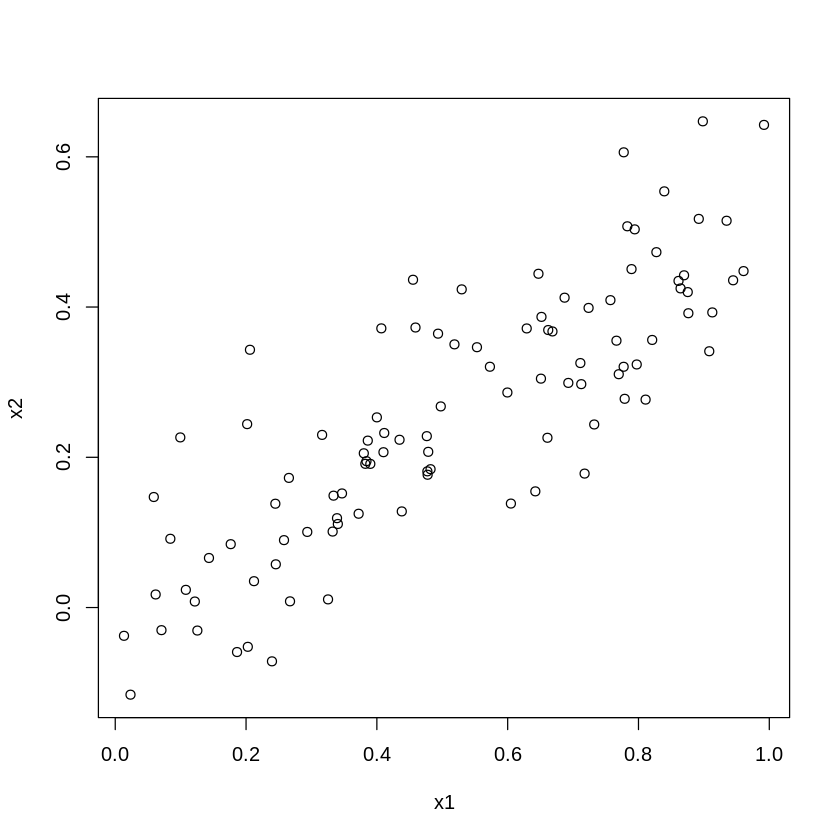

In [ ]:
cor(x1, x2)
plot(x2 ~ x1)

##### (c)
***Using this data, fit a least squares regression to predict `y` using `x1` and `x2`. Describe the results obtained. What are $\hat{\beta}_0$, $\hat{\beta}_1$, and $\hat{\beta}_2$? How do these relate to the true $\beta_0$, $\beta_1$, and $\beta_2$? Can you reject the null hypothesis $H0: \beta_1 = 0$? How about the null hypothesis $H0: \beta_2 = 0$?***

In [ ]:
m <- lm(y ~ x1 + x2)
summary(m)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8311 -0.7273 -0.0537  0.6338  2.3359 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1305     0.2319   9.188 7.61e-15 ***
x1            1.4396     0.7212   1.996   0.0487 *  
x2            1.0097     1.1337   0.891   0.3754    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.056 on 97 degrees of freedom
Multiple R-squared:  0.2088,	Adjusted R-squared:  0.1925 
F-statistic:  12.8 on 2 and 97 DF,  p-value: 1.164e-05


Even though we generated the data such that both `x1` and `x2` have actual effects, this is not reflected in our $\hat{\beta_2}$ coefficient.  But even more troubling, the `Estimate`s (at least for $\beta_1$ and $\beta_2$) are not very close to the values we know they should be (2 and 0.3).  We will find that this is due to the high correlation between `x1` and `x2`.

##### (d)
***Now fit a least squares regression to predict `y` using only `x1`. Comment on your results. Can you reject the null hypothesis $H0: \beta_1 = 0$?***

In [ ]:
m1 <- lm(y ~ x1)
summary(m1)


Call:
lm(formula = y ~ x1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.89495 -0.66874 -0.07785  0.59221  2.45560 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1124     0.2307   9.155 8.27e-15 ***
x1            1.9759     0.3963   4.986 2.66e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.055 on 98 degrees of freedom
Multiple R-squared:  0.2024,	Adjusted R-squared:  0.1942 
F-statistic: 24.86 on 1 and 98 DF,  p-value: 2.661e-06


The evidence for $\beta_1$ is stronger now than it was in the first model (as evidenced by the p-values) and its `Estimate` is much closer to the value we assigned it to be (2).

##### (e)
***Now fit a least squares regression to predict `y` using only `x2`. Comment on your results. Can you reject the null hypothesis $H0: \beta_2 = 0$?***

In [ ]:
m2 <- lm(y ~ x2)
summary(m2)


Call:
lm(formula = y ~ x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.62687 -0.75156 -0.03598  0.72383  2.44890 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.3899     0.1949   12.26  < 2e-16 ***
x2            2.8996     0.6330    4.58 1.37e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.072 on 98 degrees of freedom
Multiple R-squared:  0.1763,	Adjusted R-squared:  0.1679 
F-statistic: 20.98 on 1 and 98 DF,  p-value: 1.366e-05


Unlike in the first model, we can now reject the null hypothesis for $\hat{\beta_2}$.  Also, the `Estimate` is close to what we expect it be be.

##### (f)
***Do the results obtained in (c)–(e) contradict each other? Explain your answer.***
The possible contradiction being alluded to is that the coefficeints for `m` differ from those from `m1` and `m2`, and only the coefficients from `m1` and `m2` are *correct*.  The apparent contradiction has to do with the fact that `x1` and `x2` are highly correlated such that their coexistence in `m` causes inaccurate estimates.

##### (g)
***Now suppose we obtain one additional observation, which was unfortunately mismeasured.***

In [ ]:
x1 <- c(x1, 0.1)
x2 <- c(x2, 0.8)
y <- c(y, 6)

***Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.***

Let's first look at the correlation again.

[1] 0.7392279

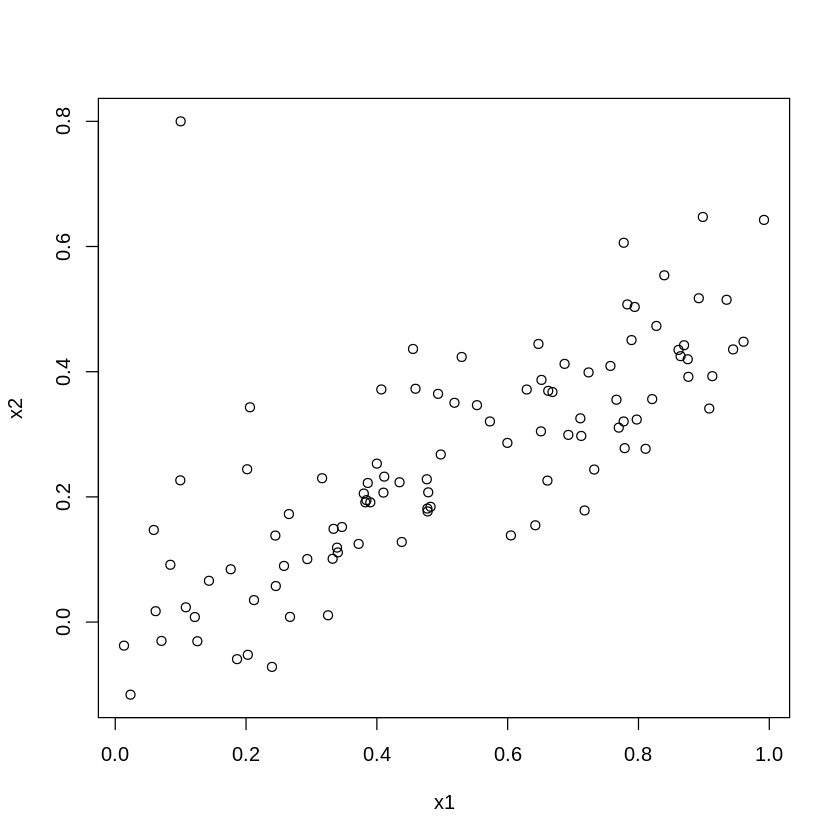

In [ ]:
cor(x1, x2)
plot(x2 ~ x1)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.73348 -0.69318 -0.05263  0.66385  2.30619 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.2267     0.2314   9.624 7.91e-16 ***
x1            0.5394     0.5922   0.911  0.36458    
x2            2.5146     0.8977   2.801  0.00614 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.075 on 98 degrees of freedom
Multiple R-squared:  0.2188,	Adjusted R-squared:  0.2029 
F-statistic: 13.72 on 2 and 98 DF,  p-value: 5.564e-06


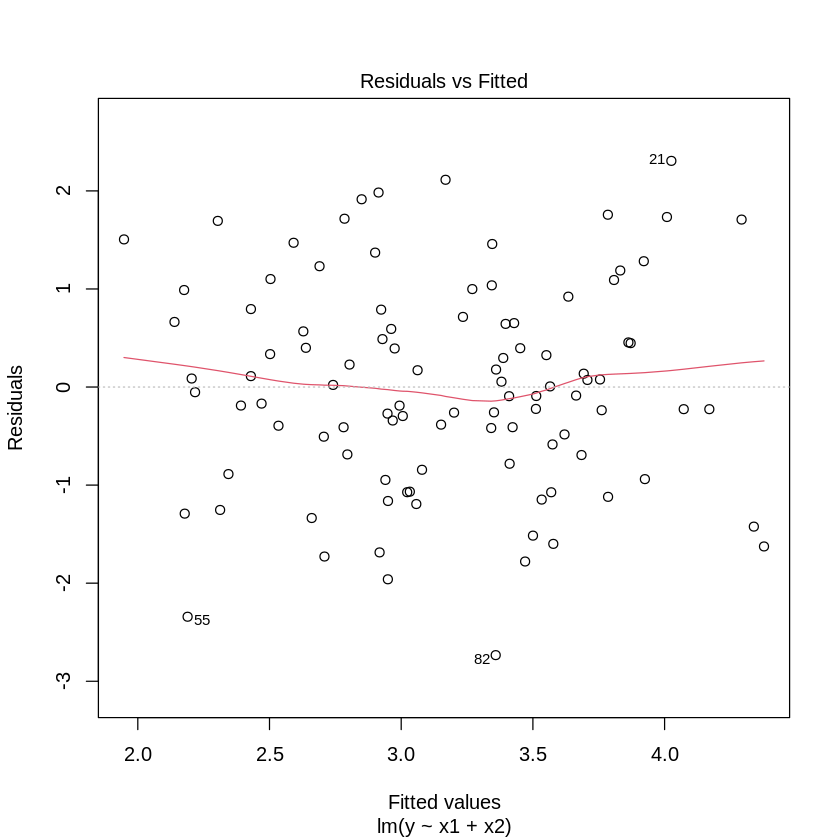

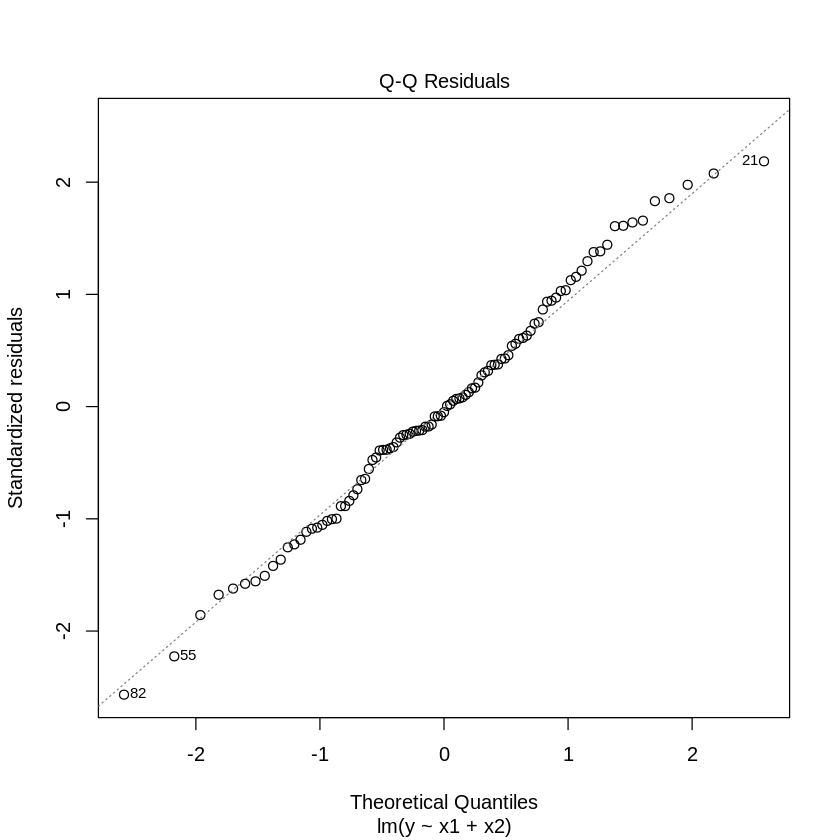

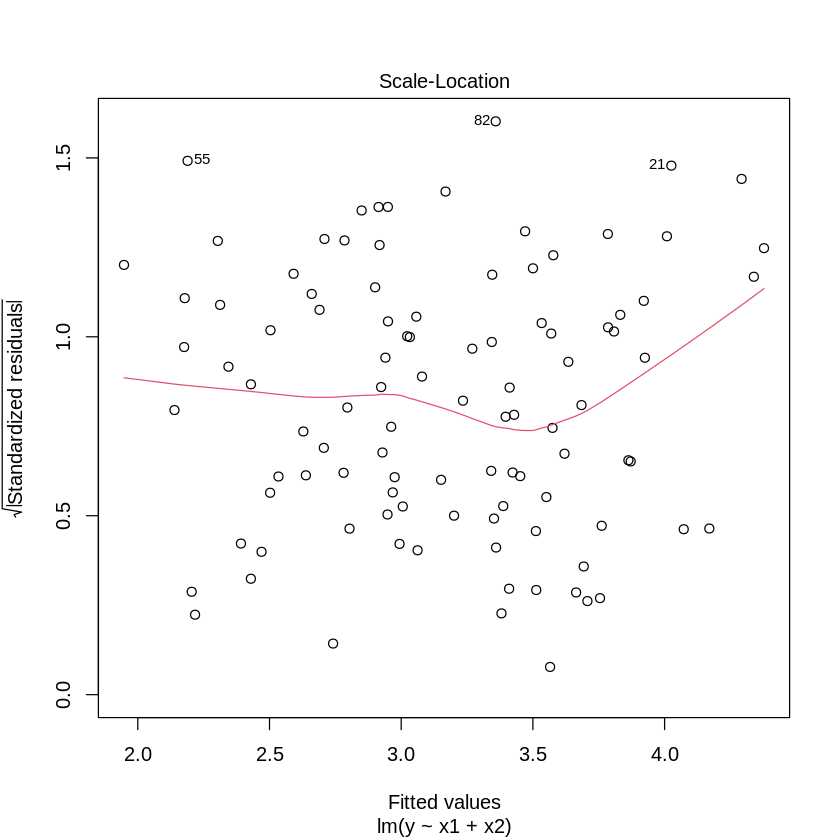

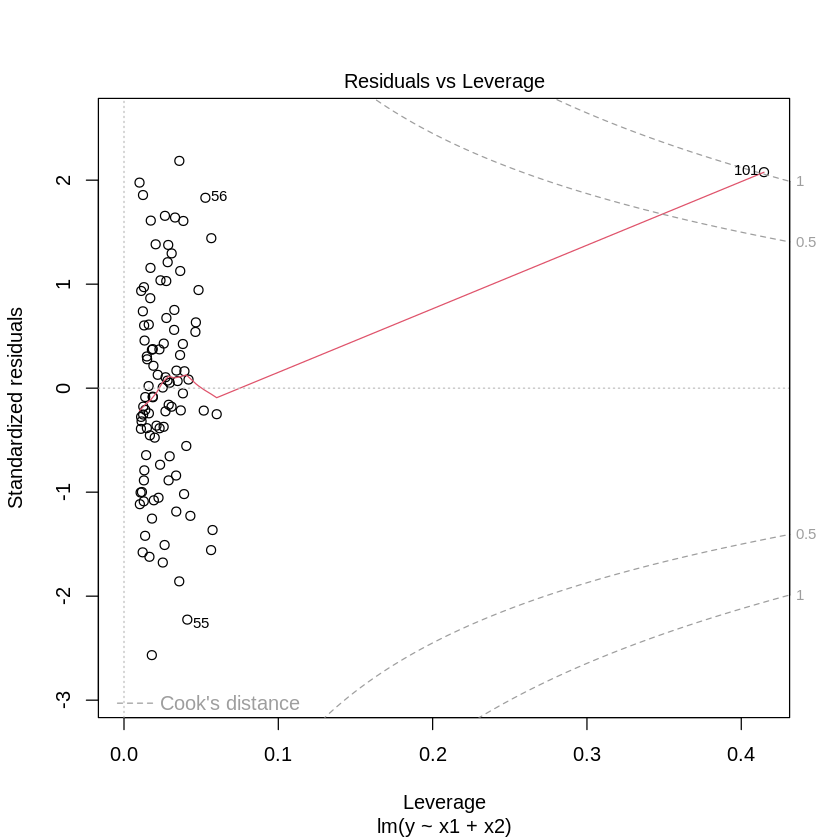

In [ ]:
mb <- lm(y ~ x1 + x2)
summary(mb)
plot(mb)

This has changed the estimates pretty drastically.  If we look at the first 3 plots from `plot(mb)`, it doesn't look like the new observation is necessarily an outlier.  However, the 4th plot does reveal that is definitely exerting a lot of influence on the fit of the line.


Call:
lm(formula = y ~ x1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8897 -0.6556 -0.0909  0.5682  3.5665 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.2569     0.2390   9.445 1.78e-15 ***
x1            1.7657     0.4124   4.282 4.29e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.111 on 99 degrees of freedom
Multiple R-squared:  0.1562,	Adjusted R-squared:  0.1477 
F-statistic: 18.33 on 1 and 99 DF,  p-value: 4.295e-05


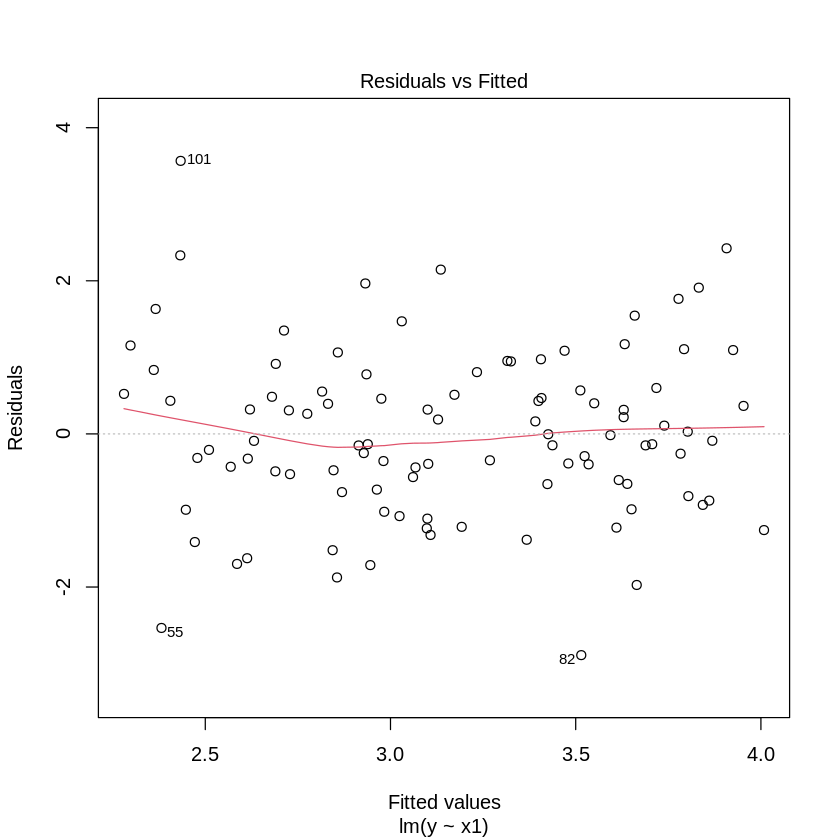

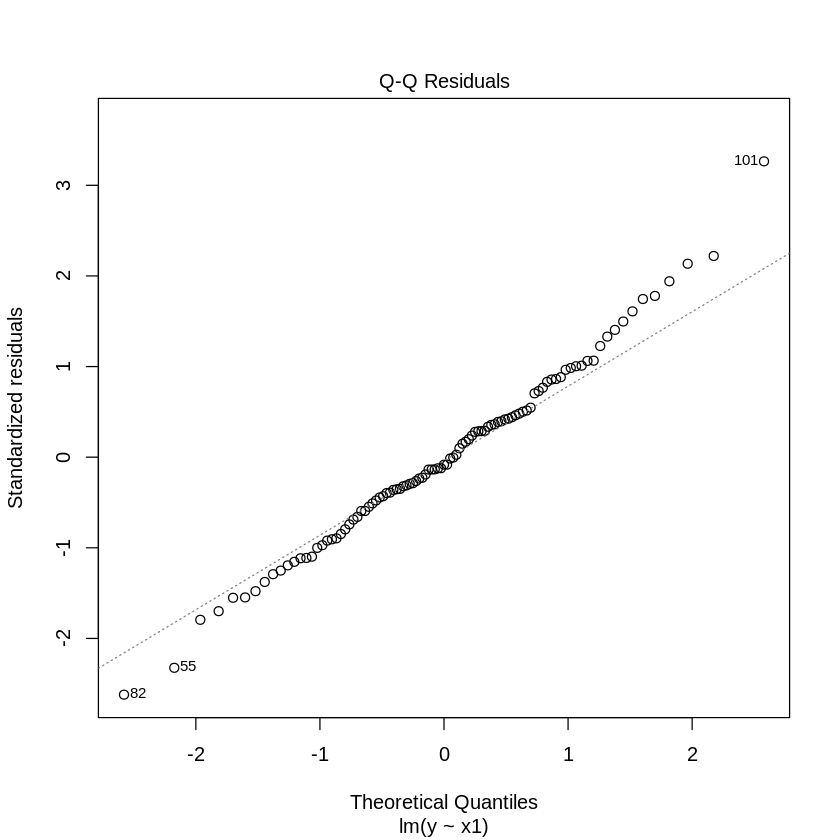

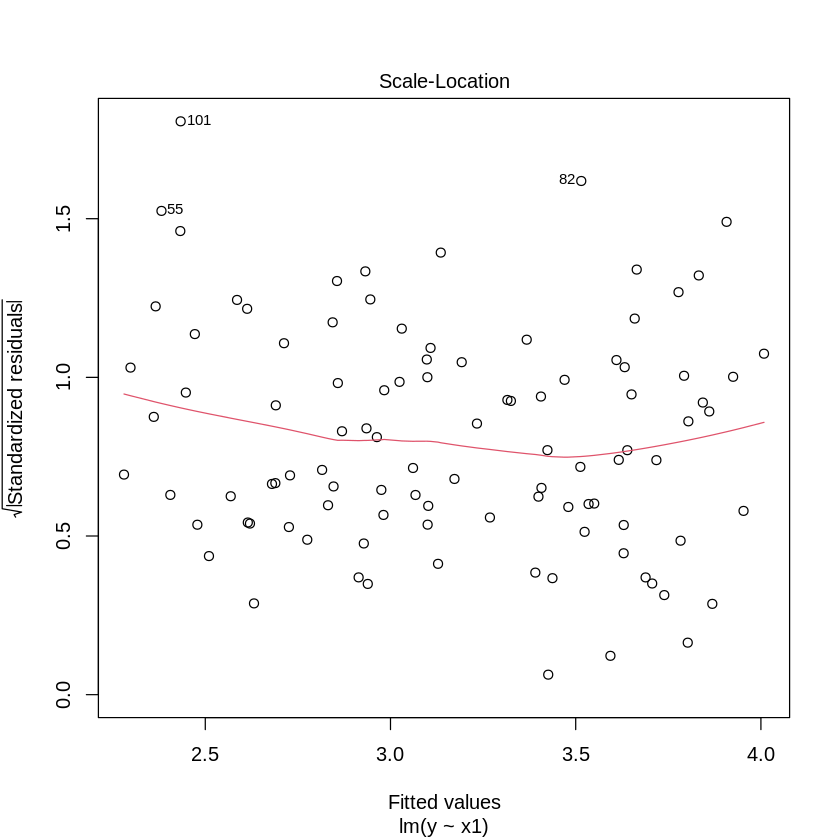

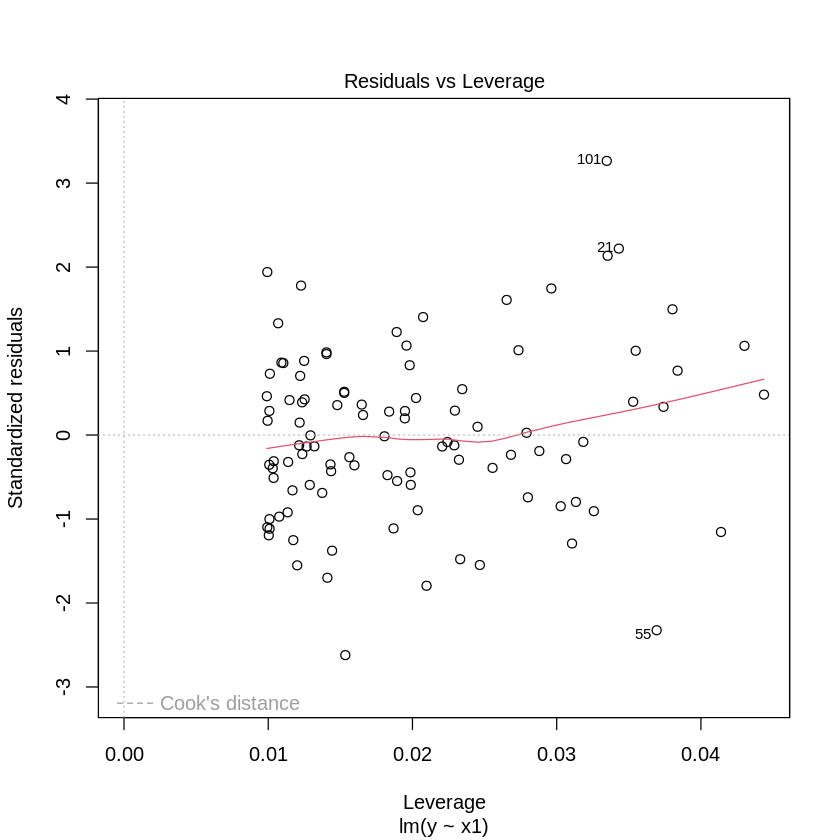

In [ ]:
m1b <- lm(y ~ x1)
summary(m1b)
plot(m1b)

Again, the new data point has changed the estimates.  Now, unlike in `mb`, the new point is revealed to be an outlier in plots 1-3.  However, it's influence over the fit in this model is reduced compared to in `mb`.


Call:
lm(formula = y ~ x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.64729 -0.71021 -0.06899  0.72699  2.38074 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.3451     0.1912  12.264  < 2e-16 ***
x2            3.1190     0.6040   5.164 1.25e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.074 on 99 degrees of freedom
Multiple R-squared:  0.2122,	Adjusted R-squared:  0.2042 
F-statistic: 26.66 on 1 and 99 DF,  p-value: 1.253e-06


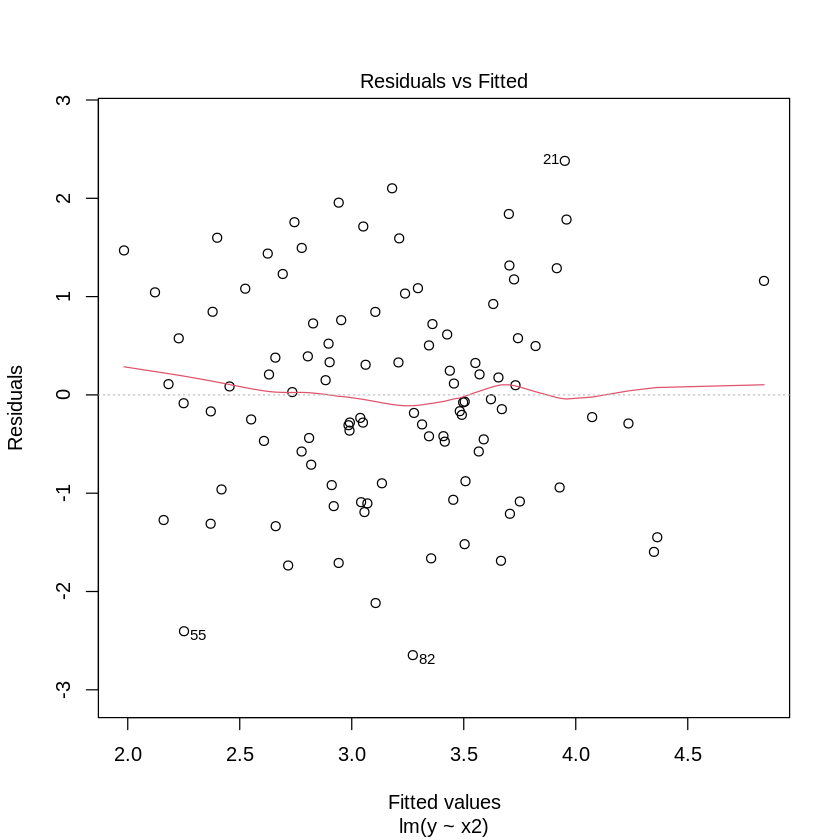

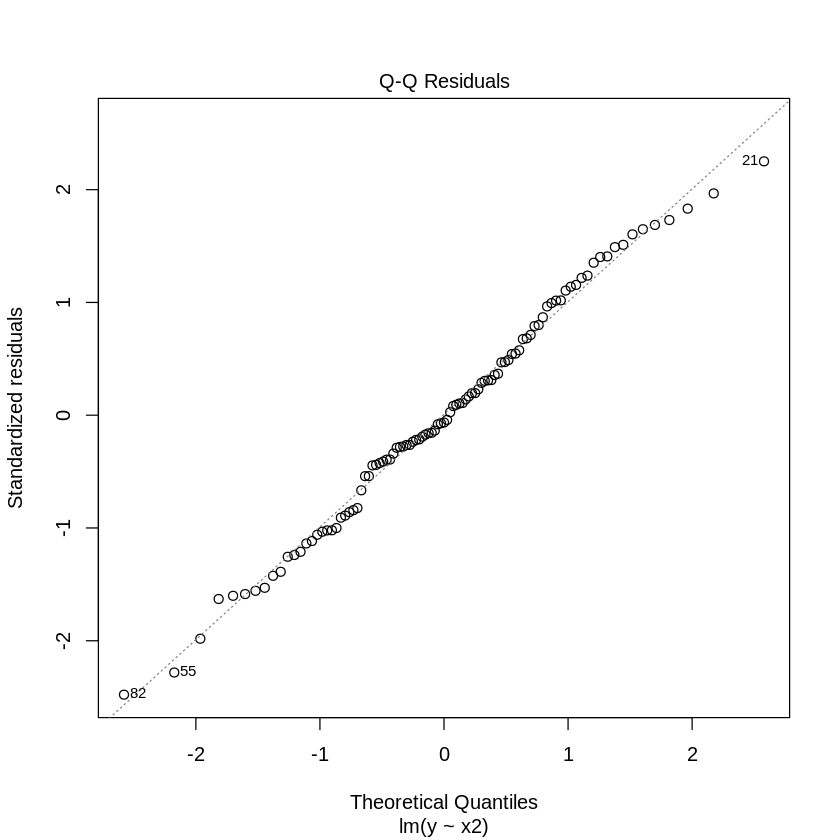

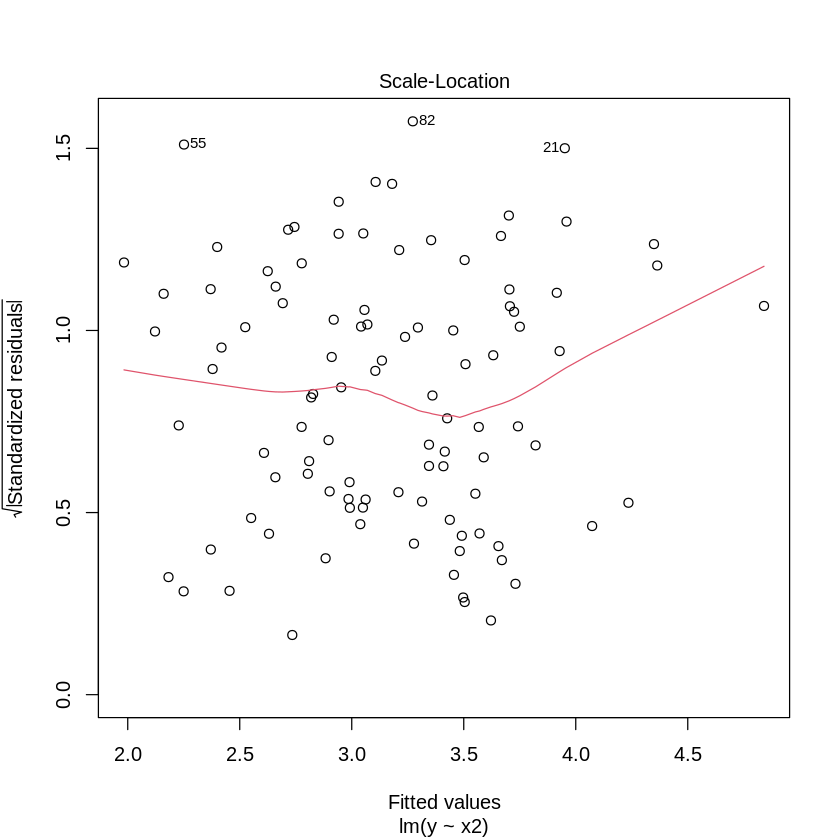

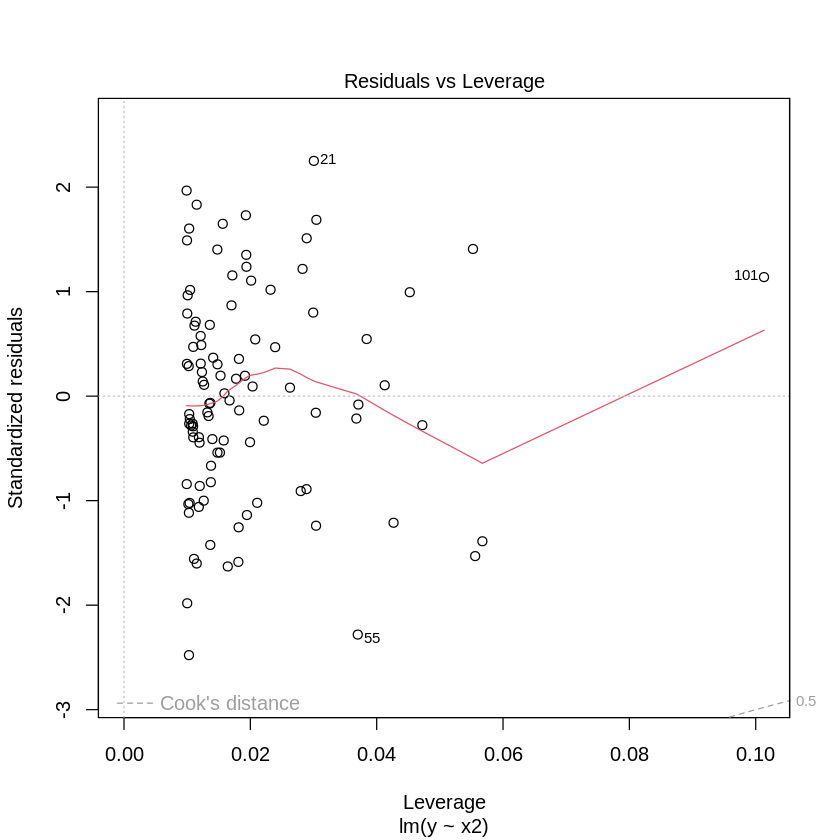

In [ ]:
m2b <- lm(y ~ x2)
summary(m2b)
plot(m2b)

In this final model, the new observation does not seem to be an outlier but does exert quite a bit of influence on the fit.

### Questions 15a-15d
This problem involves the `Boston` data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

>   (a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

>   (b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis $H0: β_j = 0$?

>   (c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

>   (d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor $X$, fit a model of the form

$$Y = β_0 + β_1 X + β_2 X^2 + β_3 X^3 + ϵ$$.

#### Answers

In [9]:
install.packages("ISLR2")
library(ISLR2)
library(MASS)
str(Boston)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


##### (a)
***For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.***

To run single regressions for each predictor variable, let's get some practice with looping code.

In [20]:
# Start by isolating the predictors
predictors <- subset(Boston, select=-crim)

# Now use a loop to make a regression for each variable in predictors
models <- lapply(predictors, function(x) lm(Boston$crim ~ x))

# And look at the coefficients
coefs <- lapply(models, function(x) summary(x)$coef[-1,])
coefs_df <- do.call(rbind, coefs)
colnames(coefs_df) <- c("Estimate", "SE", "t", "p")
round(coefs_df,2)

,Estimate,SE,t,p
zn,-0.07,0.02,-4.59,0.00
indus,0.51,0.05,9.99,0.00
chas,-1.89,1.51,-1.26,0.21
nox,31.25,3.00,10.42,0.00
rm,-2.68,0.53,-5.04,0.00
age,0.11,0.01,8.46,0.00
dis,-1.55,0.17,-9.21,0.00
rad,0.62,0.03,18.00,0.00
tax,0.03,0.00,16.10,0.00
ptratio,1.15,0.17,6.80,0.00


It looks like all but `chas` is significantly associated with `crim`.

I'm not sure how we're supposed to support our assertions with plots.  But let's plot the p-values against estimates.

Warning message in arrows(coefs_df[, "Estimate"] - 2 * coefs_df[, "SE"], coefs_df[, :
“zero-length arrow is of indeterminate angle and so skipped”


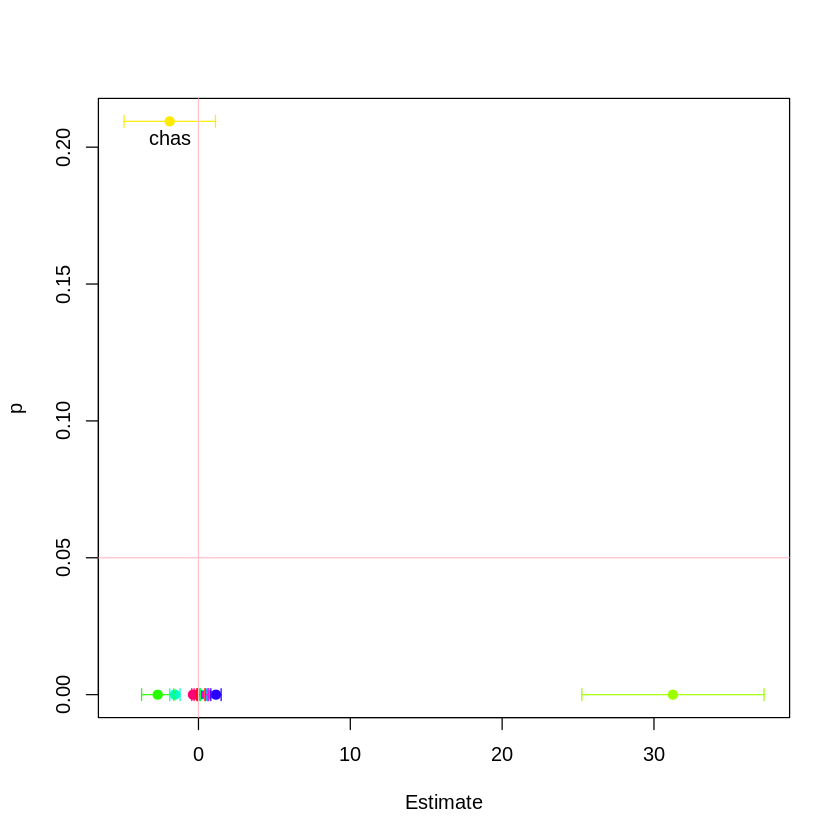

In [52]:
marker_colors <- rainbow(length(coefs_df[, "Estimate"]))

plot(p ~ Estimate, data=coefs_df,
     xlim = range(coefs_df[,"Estimate"] - 2*coefs_df[,"SE"],
                  coefs_df[,"Estimate"] + 2*coefs_df[,"SE"]),
                  pch=19, col=marker_colors)

arrows(coefs_df[,"Estimate"] - 2*coefs_df[,"SE"], coefs_df[,"p"],
       coefs_df[,"Estimate"] + 2*coefs_df[,"SE"], coefs_df[,"p"],
       angle = 90, code = 3, length = 0.05, col=marker_colors)

text(coefs_df[3, "Estimate"], coefs_df[3, "p"], "chas", pos = 1, offset = 0.5)

abline(v=0, col="pink")
abline(h=0.05, col="pink")

##### (b)
***Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis $H0: β_j = 0$?***

In [58]:
m_all <- lm(crim ~ ., data=Boston)
coefs_all_df <- coef(summary(m_all))[-1,]
colnames(coefs_all_df) <- colnames(coefs_df)
round(coefs_all_df,2)

,Estimate,SE,t,p
zn,0.04,0.02,2.39,0.02
indus,-0.06,0.08,-0.77,0.44
chas,-0.75,1.18,-0.63,0.53
nox,-10.31,5.28,-1.95,0.05
rm,0.43,0.61,0.70,0.48
age,0.00,0.02,0.08,0.94
dis,-0.99,0.28,-3.50,0.00
rad,0.59,0.09,6.68,0.00
tax,0.00,0.01,-0.73,0.46
ptratio,-0.27,0.19,-1.45,0.15


Now the significantly-associated markers have changed.  Let's make this more apparent in tabular and plot forms.

,Estimate,SE,t,p,Estimate,SE,t,p
zn,-0.07,0.02,-4.59,0.00,0.04,0.02,2.39,0.02
indus,0.51,0.05,9.99,0.00,-0.06,0.08,-0.77,0.44
chas,-1.89,1.51,-1.26,0.21,-0.75,1.18,-0.63,0.53
nox,31.25,3.00,10.42,0.00,-10.31,5.28,-1.95,0.05
rm,-2.68,0.53,-5.04,0.00,0.43,0.61,0.70,0.48
age,0.11,0.01,8.46,0.00,0.00,0.02,0.08,0.94
dis,-1.55,0.17,-9.21,0.00,-0.99,0.28,-3.50,0.00
rad,0.62,0.03,18.00,0.00,0.59,0.09,6.68,0.00
tax,0.03,0.00,16.10,0.00,0.00,0.01,-0.73,0.46
ptratio,1.15,0.17,6.80,0.00,-0.27,0.19,-1.45,0.15


,dEst,dp
zn,-0.12,-0.02
indus,0.57,-0.44
chas,-1.14,-0.32
nox,41.56,-0.05
rm,-3.11,-0.48
age,0.11,-0.94
dis,-0.56,0.00
rad,0.03,0.00
tax,0.03,-0.46
ptratio,1.42,-0.15


Warning message in arrows(coefs_df[, "Estimate"] - 2 * coefs_df[, "SE"], coefs_df[, :
“zero-length arrow is of indeterminate angle and so skipped”


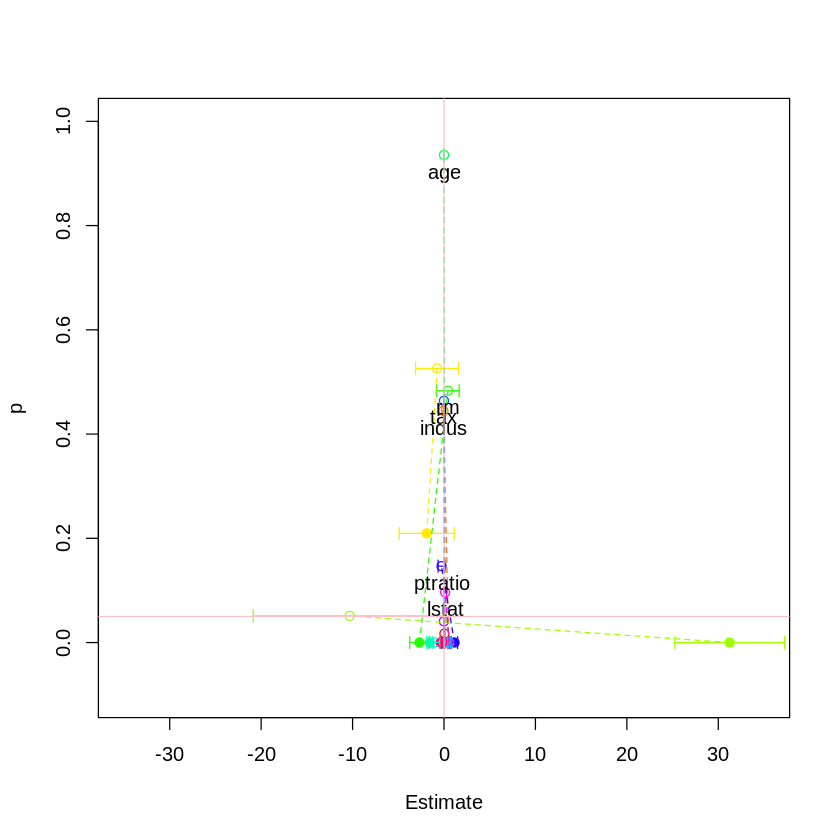

In [89]:
(comparison <- round(cbind(coefs_df, coefs_all_df),2))
dEst <- round(coefs_df[,"Estimate"] - coefs_all_df[,"Estimate"], 2)
dp <- round(coefs_df[,"p"] - coefs_all_df[,"p"],2)
cbind(dEst, dp)

marker_colors <- rainbow(length(coefs_df[, "Estimate"]))

plot(p ~ Estimate, data=coefs_df,
     xlim = c(-35,35),
      ylim = c(-0.1,1),
      pch=19, col=marker_colors)
arrows(coefs_df[,"Estimate"] - 2*coefs_df[,"SE"], coefs_df[,"p"],
       coefs_df[,"Estimate"] + 2*coefs_df[,"SE"], coefs_df[,"p"],
       angle = 90, code = 3, length = 0.05, col=marker_colors)

points(coefs_all_df[,"Estimate"], coefs_all_df[,"p"], col = marker_colors)
arrows(coefs_all_df[,"Estimate"] - 2 * coefs_all_df[,"SE"], coefs_all_df[,"p"],
       coefs_all_df[,"Estimate"] + 2 * coefs_all_df[,"SE"], coefs_all_df[,"p"],
       angle = 90, code = 3, length = 0.05, col = marker_colors)

for (i in 1:nrow(coefs_df)) {
  lines(c(coefs_df[i, "Estimate"], coefs_all_df[i, "Estimate"]),
        c(coefs_df[i, "p"], coefs_all_df[i, "p"]),
        col = marker_colors[i], lty=2)
}


text(coefs_all_df[2, "Estimate"], coefs_all_df[2, "p"], "indus", pos = 1, offset = 0.5)
text(coefs_all_df[5, "Estimate"], coefs_all_df[5, "p"], "rm", pos = 1, offset = 0.5)
text(coefs_all_df[6, "Estimate"], coefs_all_df[6, "p"], "age", pos = 1, offset = 0.5)
text(coefs_all_df[9, "Estimate"], coefs_all_df[9, "p"], "tax", pos = 1, offset = 0.5)
text(coefs_all_df[10, "Estimate"], coefs_all_df[10, "p"], "ptratio", pos = 1, offset = 0.5)
text(coefs_all_df[12, "Estimate"], coefs_all_df[12, "p"], "lstat", pos = 1, offset = 0.5)

abline(v=0, col="pink")
abline(h=0.05, col="pink")

This is not a great plot.  There's too much going on, but the idea is that the univariate regression points are plotted in solid circles, the multi-variate points are in hollow circles, all predictor variables are given a unique color, and a dotted line attaches the univariate to the multivariate.

The next question will prompt us to give clearer plots.

##### (c)
***How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.***

Warning message in arrows(coefs_df[, "Estimate"] - 2 * coefs_df[, "SE"], coefs_all_df[, :
“zero-length arrow is of indeterminate angle and so skipped”


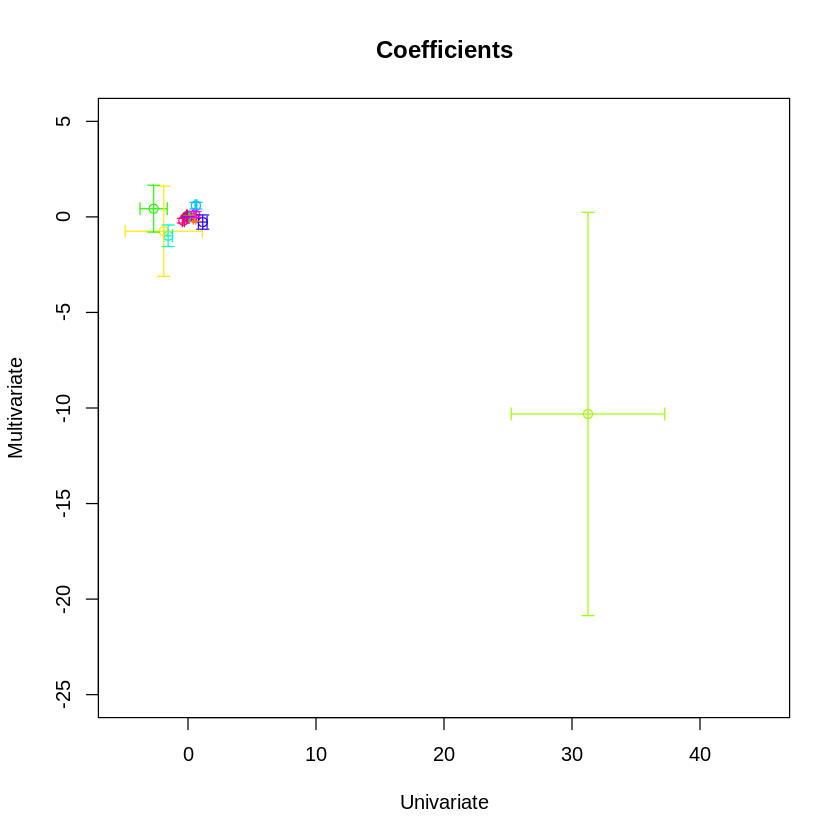

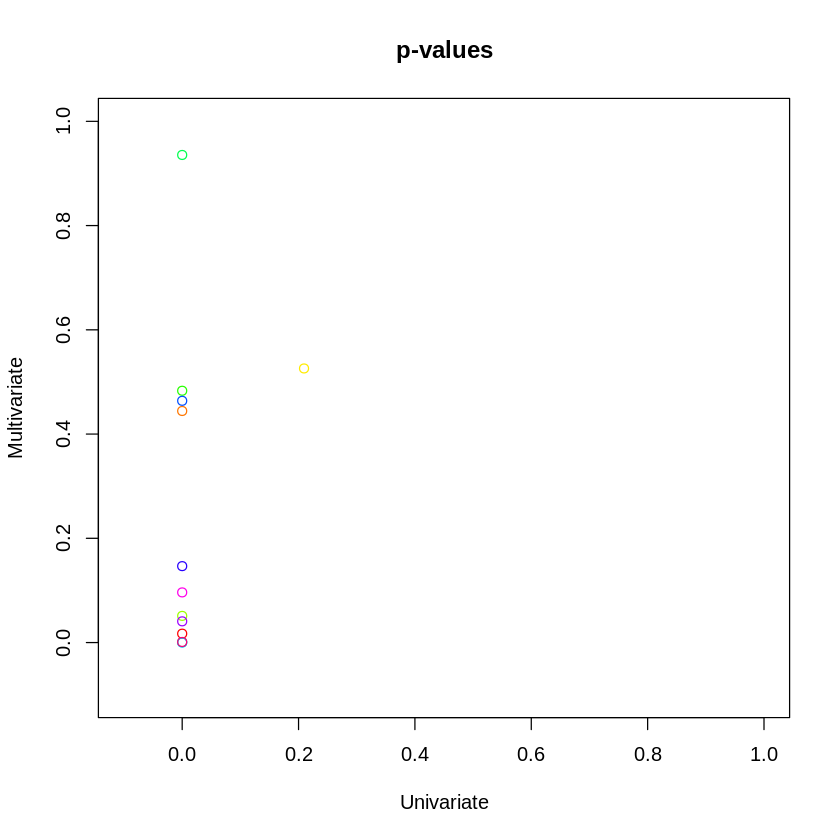

In [109]:
plot(coefs_all_df[,"Estimate"] ~ coefs_df[,"Estimate"],
     xlab="Univariate", ylab="Multivariate", main="Coefficients",
     col=marker_colors, xlim=c(-5, 45), ylim=c(-25,5))
arrows(coefs_df[,"Estimate"] - 2 * coefs_df[,"SE"], coefs_all_df[,"Estimate"],
       coefs_df[,"Estimate"] + 2 * coefs_df[,"SE"], coefs_all_df[,"Estimate"],
       angle = 90, code = 3, length = 0.05, col = marker_colors)
arrows(coefs_df[,"Estimate"], coefs_all_df[,"Estimate"] - 2 * coefs_all_df[,"SE"],
       coefs_df[,"Estimate"], coefs_all_df[,"Estimate"] + 2 * coefs_all_df[,"SE"],
       angle = 90, code = 3, length = 0.05, col = marker_colors)

plot(coefs_all_df[,"p"] ~ coefs_df[,"p"],
     xlab="Univariate", ylab="Multivariate", main="p-values",
     col=marker_colors, xlim=c(-0.1, 1), ylim=c(-0.1,1))

##### (d)
***Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor $X$, fit a model of the form***

$$Y = β_0 + β_1 X + β_2 X^2 + β_3 X^3 + ϵ$$.

For this, we'll just modify the code from part (a).

In [140]:
no_chas <- subset(predictors, select=-chas) # Omitting chas since won't work with polynomial regression
NLmodels <- lapply(no_chas, function(x) lm(Boston$crim ~ poly(x,3)))

# And look at the coefficients
NLcoefs <- lapply(NLmodels, function(x) summary(x)$coef[-1,])
NLcoefs_df <- do.call(rbind, NLcoefs)
colnames(NLcoefs_df) <- c("Estimate", "SE", "t", "p")
rownames(NLcoefs_df) <- rep(names(no_chas), each=3)
round(NLcoefs_df,2)

,Estimate,SE,t,p
zn,-38.75,8.37,-4.63,0.00
zn,23.94,8.37,2.86,0.00
zn,-10.07,8.37,-1.20,0.23
indus,78.59,7.42,10.59,0.00
indus,-24.39,7.42,-3.29,0.00
indus,-54.13,7.42,-7.29,0.00
nox,81.37,7.23,11.25,0.00
nox,-28.83,7.23,-3.99,0.00
nox,-60.36,7.23,-8.34,0.00
rm,-42.38,8.33,-5.09,0.00
